In [1]:
import pandas as pd
from torch.utils.data import Dataset

# Load the CSV file
file_path = 'ModApte_train.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe
print(data.head())


                                                text text_type  \
0  Showers continued throughout the week in\nthe ...    "NORM"   
1  The U.S. Agriculture Department\nreported the ...    "NORM"   
2  Argentine grain board figures show\ncrop regis...    "NORM"   
3  Moody's Investors Service Inc said it\nlowered...    "NORM"   
4  Champion Products Inc said its\nboard of direc...    "NORM"   

                                              topics lewis_split  \
0                                          ['cocoa']     "TRAIN"   
1  ['grain' 'wheat' 'corn' 'barley' 'oat' 'sorghum']     "TRAIN"   
2  ['veg-oil' 'linseed' 'lin-oil' 'soy-oil' 'sun-...     "TRAIN"   
3                                                 []     "TRAIN"   
4                                           ['earn']     "TRAIN"   

       cgis_split  old_id new_id                           places people orgs  \
0  "TRAINING-SET"  "5544"    "1"  ['el-salvador' 'usa' 'uruguay']     []   []   
1  "TRAINING-SET"  "5548"    "5"

In [2]:
# Function to clean and split the list columns
def clean_split(column):
    return column.strip("[]").replace("'", "").split()

# Apply the clean_split function to topics and places columns
data['topics'] = data['topics'].apply(clean_split)
data['places'] = data['places'].apply(clean_split)

# Filter documents with single topic and single place
filtered_data = data[(data['topics'].map(len) == 1) & (data['places'].map(len) == 1)]


# Extract the single topic and place
filtered_data['topics'] = filtered_data['topics'].apply(lambda x: x[0])
filtered_data['places'] = filtered_data['places'].apply(lambda x: x[0])

# Count the number of unique topics and places
unique_topics = filtered_data['topics'].nunique()
unique_places = filtered_data['places'].nunique()
total_documents = filtered_data.shape[0]

print(f"Total number of filtered documents: {total_documents}")
print(f"Number of unique topics: {unique_topics}")
print(f"Number of unique places: {unique_places}")

# Display a sample of the filtered data
print(filtered_data.head())


Total number of filtered documents: 5495
Number of unique topics: 56
Number of unique places: 79
                                                text text_type topics  \
4  Champion Products Inc said its\nboard of direc...    "NORM"   earn   
5  Computer Terminal Systems Inc said\nit has com...    "NORM"    acq   
6  Shr 34 cts vs 1.19 dlrs\n    Net 807,000 vs 2,...    "NORM"   earn   
8  Oper shr loss two cts vs profit seven cts\n   ...    "NORM"   earn   
9  Shr one dlr vs 73 cts\n    Net 12.6 mln vs 15....    "NORM"   earn   

  lewis_split      cgis_split  old_id new_id places people orgs exchanges  \
4     "TRAIN"  "TRAINING-SET"  "5552"    "9"    usa     []   []        []   
5     "TRAIN"  "TRAINING-SET"  "5553"   "10"    usa     []   []        []   
6     "TRAIN"  "TRAINING-SET"  "5554"   "11"    usa     []   []        []   
8     "TRAIN"  "TRAINING-SET"  "5556"   "13"    usa     []   []        []   
9     "TRAIN"  "TRAINING-SET"  "5557"   "14"    usa     []   []        []   

 

C:\Users\gslax\AppData\Local\Temp\ipykernel_7264\4216121835.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['topics'] = filtered_data['topics'].apply(lambda x: x[0])
C:\Users\gslax\AppData\Local\Temp\ipykernel_7264\4216121835.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['places'] = filtered_data['places'].apply(lambda x: x[0])


In [3]:
filtered_train_data = filtered_data

In [4]:
from collections import Counter

# Count the number of instances for each topic
topic_counts = Counter(filtered_data['topics'])

#print("Number of instances for each topic:")
#for topic, count in topic_counts.items():
#    print(f"{topic}: {count}")

# Count the number of instances for each place
place_counts = Counter(filtered_data['places'])

#print("\nNumber of instances for each place:")
#for place, count in place_counts.items():
#    print(f"{place}: {count}")


In [5]:
import pandas as pd

# Load the CSV file
test_file_path  = 'ModApte_test.csv'
test_data  = pd.read_csv(test_file_path)

# Display the first few rows of the dataframe
print(test_data.head())

                                                text text_type  \
0  Mounting trade friction between the\nU.S. And ...    "NORM"   
1  A survey of 19 provinces and seven cities\nsho...    "NORM"   
2  The Ministry of International Trade and\nIndus...    "NORM"   
3  Thailand's trade deficit widened to 4.5\nbilli...    "NORM"   
4  Indonesia expects crude palm oil (CPO)\nprices...    "NORM"   

                                              topics lewis_split  \
0                                          ['trade']      "TEST"   
1                                          ['grain']      "TEST"   
2                                ['crude' 'nat-gas']      "TEST"   
3  ['trade' 'grain' 'rice' 'corn' 'sugar' 'tin' '...      "TEST"   
4                             ['veg-oil' 'palm-oil']      "TEST"   

       cgis_split  old_id   new_id  \
0  "TRAINING-SET"  "3809"  "14826"   
1  "TRAINING-SET"  "3811"  "14828"   
2  "TRAINING-SET"  "4356"  "14829"   
3  "TRAINING-SET"  "3815"  "14832"   
4  "

In [6]:
# Apply the clean_split function to topics and places columns
test_data['topics'] = test_data['topics'].apply(clean_split)
test_data['places'] = test_data['places'].apply(clean_split)

# Filter documents with single topic and single place
filtered_test_data = test_data[(test_data['topics'].map(len) == 1) & (test_data['places'].map(len) == 1)]

# Extract the single topic and place
filtered_test_data['topics'] = filtered_test_data['topics'].apply(lambda x: x[0])
filtered_test_data['places'] = filtered_test_data['places'].apply(lambda x: x[0])

# Count the number of unique topics and places
unique_test_topics = filtered_test_data['topics'].nunique()
unique_test_places = filtered_test_data['places'].nunique()
total_test_documents = filtered_test_data.shape[0]

print(f"Total number of filtered test documents: {total_test_documents}")
print(f"Number of unique test topics: {unique_test_topics}")
print(f"Number of unique test places: {unique_test_places}")

# Display a sample of the filtered test data
print(filtered_test_data.head())


Total number of filtered test documents: 2120
Number of unique test topics: 53
Number of unique test places: 57
                                                 text text_type topics  \
1   A survey of 19 provinces and seven cities\nsho...    "NORM"  grain   
6   Tug crews in New South Wales (NSW),\nVictoria ...    "NORM"   ship   
9   Western Mining Corp Holdings Ltd\n&lt;WMNG.S> ...    "NORM"   gold   
11  Mines and Energy Minister Subroto\nconfirmed I...    "NORM"    tin   
16  China's industrial output rose 14.1 pct\nin th...    "NORM"    ipi   

   lewis_split      cgis_split  old_id   new_id     places       people orgs  \
1       "TEST"  "TRAINING-SET"  "3811"  "14828"      china           []   []   
6       "TEST"  "TRAINING-SET"  "3822"  "14839"  australia           []   []   
9       "TEST"  "TRAINING-SET"  "3825"  "14842"  australia           []   []   
11      "TEST"  "TRAINING-SET"  "3827"  "14844"  indonesia  ['subroto']   []   
16      "TEST"  "TRAINING-SET"  "3837"  "14

C:\Users\gslax\AppData\Local\Temp\ipykernel_7264\1815590157.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_test_data['topics'] = filtered_test_data['topics'].apply(lambda x: x[0])
C:\Users\gslax\AppData\Local\Temp\ipykernel_7264\1815590157.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_test_data['places'] = filtered_test_data['places'].apply(lambda x: x[0])


In [7]:
# Fill NaN values in the text column with an empty string in both training and test data
filtered_train_data['text'] = filtered_train_data['text'].fillna('')
filtered_test_data['text'] = filtered_test_data['text'].fillna('')

# Verify that there are no NaN values
print(filtered_train_data['text'].isna().sum())  # Should print 0
print(filtered_test_data['text'].isna().sum())  # Should print 0

0
0


C:\Users\gslax\AppData\Local\Temp\ipykernel_7264\852129625.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_train_data['text'] = filtered_train_data['text'].fillna('')
C:\Users\gslax\AppData\Local\Temp\ipykernel_7264\852129625.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_test_data['text'] = filtered_test_data['text'].fillna('')


In [8]:
# Identify unseen labels in topics
unseen_topics = set(filtered_test_data['topics']) - set(filtered_train_data['topics'])
print("Unseen topics in test data:", unseen_topics)

# Identify unseen labels in places
unseen_places = set(filtered_test_data['places']) - set(filtered_train_data['places'])
print("Unseen places in test data:", unseen_places)

# Filter out rows with unseen labels in the test data
filtered_test_data = filtered_test_data[~filtered_test_data['topics'].isin(unseen_topics)]
filtered_test_data = filtered_test_data[~filtered_test_data['places'].isin(unseen_places)]

# Verify the filtered test data
print(f"Total number of filtered test documents: {filtered_test_data.shape[0]}")
print(f"Number of unique topics in test data: {filtered_test_data['topics'].nunique()}")
print(f"Number of unique places in test data: {filtered_test_data['places'].nunique()}")


Unseen topics in test data: {'yen', 'tea', 'propane', 'naphtha'}
Unseen places in test data: {'fiji', 'lebanon', 'tanzania', 'yemen-arab-republic'}
Total number of filtered test documents: 2105
Number of unique topics in test data: 49
Number of unique places in test data: 53


In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from sklearn.metrics import accuracy_score, precision_score, recall_score, cohen_kappa_score

batch_size = 64

# Define the neural network model
class Net(nn.Module):
    def __init__(self, input_dim, shared_dim, output_dim_A, output_dim_B):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_dim + 1, shared_dim)  # +1 for the task identifier
        self.fc2 = nn.Linear(shared_dim, shared_dim)
        self.fc3_A = nn.Linear(shared_dim, output_dim_A)
        self.fc3_B = nn.Linear(shared_dim, output_dim_B)

    def forward(self, x, task_id):
        #print(f"[Net.forward] Initial x shape: {x.shape}")
        #print(f"[Net.forward] Initial task_id shape: {task_id.shape}")

        if len(x.shape) == 2:  # x is (batch_size, features)
            task_id = task_id.float().view(-1, 1)  # Ensure task_id has shape (batch_size, 1) and is float
            x = torch.cat((x, task_id), dim=1)  # Concatenate along feature dimension
            #print(f"[Net.forward] Concatenated x shape: {x.shape}")
        else:
            raise ValueError("Unexpected input dimensions: expected 2D tensor for x.")

        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))

        output_A = self.fc3_A(x)
        output_B = self.fc3_B(x)

        if output_A.shape != output_B.shape:
            raise ValueError(f"Output shapes must match: output_A {output_A.shape}, output_B {output_B.shape}")

        task_id_expanded = task_id.expand_as(output_A)
        output = torch.where(task_id_expanded == 1.0, output_A, output_B)

        return output
        
class EWC:
    def __init__(self, model, dataloader, importance=10000):
        self.model = model
        self.dataloader = dataloader
        self.importance = importance
        self.initial_params = {n: p.clone() for n, p in self.model.named_parameters()}
        self.fisher_diagonal = self.compute_fisher_information()

    def compute_fisher_information(self):
        fisher_diagonal = {n: torch.zeros_like(p) for n, p in self.model.named_parameters()}
        mean_fisher = {n: torch.zeros_like(p) for n, p in self.model.named_parameters()}
        self.model.eval()
        
        for i, (data, target, task_id) in enumerate(self.dataloader, 1):
            self.model.zero_grad()
            output = self.model(data, task_id)
            loss = F.nll_loss(F.log_softmax(output, dim=1), target)
            loss.backward()
            
            for n, p in self.model.named_parameters():
                grad_squared = p.grad ** 2
                
                # Apply the formula for online mean calculation
                fisher_diagonal[n] = fisher_diagonal[n] + (grad_squared - fisher_diagonal[n]) / i
    
        return fisher_diagonal


    def penalty(self):
        penalty = 0
        for n, p in self.model.named_parameters():
            penalty += (self.fisher_diagonal[n] * (p - self.initial_params[n]) ** 2).sum()
        return self.importance * penalty


        
# Define training and testing functions
# Training function
def train(model, loader, optimizer, criterion, epochs=20):
    model.train()
    for epoch in range(epochs):
        epoch_loss = 0
        for data, target, task_id in loader:
            #print(f"[train] Data shape: {data.shape}, Target shape: {target.shape}, Task ID shape: {task_id.shape}")
            task_id = task_id.float().view(-1, 1)  # Ensure task_id has shape (batch_size, 1) and is float
            #print(f"[train] Reshaped task_id: {task_id.shape}")
            optimizer.zero_grad()
            output = model(data, task_id)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
        print(f'Epoch {epoch+1}/{epochs}, Loss: {epoch_loss/len(loader)}')
        
def test(model, dataloader, criterion):
    model.eval()
    correct = 0
    total = 0
    y_true = []
    y_pred = []
    with torch.no_grad():
        for input, target in dataloader:
            input = input.to(next(model.parameters()).device)
            target = target.to(next(model.parameters()).device)
            output = model(input)
            _, predicted = torch.max(output.data, 1)
            total += target.size(0)
            correct += (predicted == target).sum().item()
            y_true.extend(target.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())
    accuracy = correct / total
    precision = precision_score(y_true, y_pred, average='macro', zero_division=0)
    recall = recall_score(y_true, y_pred, average='macro', zero_division=0)
    cohen_kappa = cohen_kappa_score(y_true, y_pred)
    return accuracy, precision, recall, cohen_kappa

# Define the train_with_ewc function as you provided it
def train_with_ewc(model, loader, ewc, optimizer, criterion, epochs=20):
    model.train()
    for epoch in range(epochs):
        epoch_loss = 0
        total_penalty = 0
        for data, target, task_id in loader:
            #print(f"[train_with_ewc] Data shape: {data.shape}, Target shape: {target.shape}, Task ID shape: {task_id.shape}")
            task_id = task_id.float().view(-1, 1)  # Ensure task_id has shape (batch_size, 1) and is float
            optimizer.zero_grad()
            output = model(data, task_id)
            loss = criterion(output, target)
            penalty = ewc.penalty()
            total_loss = loss + penalty
            total_loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
            total_penalty += penalty.item()
        print(f'Epoch {epoch+1}/{epochs}, Loss: {epoch_loss/len(loader)}, EWC Penalty: {total_penalty/len(loader)}')


def evaluate(model, loader, criterion):
    model.eval()
    total_loss = 0
    all_targets = []
    all_predictions = []
    with torch.no_grad():
        for data, target, task_id in loader:  # Get data, target, and task_id
            task_id = task_id.view(-1, 1)  # Ensure task_id has shape (batch_size, 1)
            output = model(data, task_id)
            loss = criterion(output, target)
            total_loss += loss.item()
            predictions = torch.argmax(output, dim=1)
            all_targets.extend(target.numpy())
            all_predictions.extend(predictions.numpy())

    accuracy = accuracy_score(all_targets, all_predictions)
    precision = precision_score(all_targets, all_predictions, average='weighted', zero_division=0)
    recall = recall_score(all_targets, all_predictions, average='weighted', zero_division=0)
    kappa = cohen_kappa_score(all_targets, all_predictions)

    return accuracy, precision, recall, kappa

In [150]:
def train_with_patience(model, loader, optimizer, criterion, epochs=20, patience=5):
    model.train()
    best_loss = float('inf')
    no_improvement = 0
    epoch_accuracy = []
    epochs_loss = []

    for epoch in range(epochs):
        epoch_loss = 0
        correct = 0
        total = 0
        for data, target, task_id in loader:  # Ensure the DataLoader returns three items
            optimizer.zero_grad()
            output = model(data, task_id)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
            _, predicted = torch.max(output, 1)
            correct += (predicted == target).sum().item()
            total += target.size(0)

        avg_loss = epoch_loss / len(loader)
        accuracy = correct / total
        epoch_accuracy.append(accuracy)
        epochs_loss.append(avg_loss)
        print(f'Epoch {epoch+1}/{epochs}, Loss: {avg_loss:.4f}')

        # Check for improvement
        if avg_loss < best_loss:
            best_loss = avg_loss
            no_improvement = 0
        else:
            no_improvement += 1

        # Early stopping criteria
        if no_improvement >= patience:
            print(f"Stopping early due to no improvement in loss for {patience} consecutive epochs.")
            break

    return epoch_accuracy, epochs_loss


def train_with_ewc_with_patience(model, loader, ewc, optimizer, criterion, epochs=20, patience=5):
    model.train()
    best_loss = float('inf')
    no_improvement = 0
    epoch_accuracy = []
    epochs_loss = []

    for epoch in range(epochs):
        total_loss = 0
        total_penalty = 0
        total = 0
        correct = 0
        for data, target, task_id in loader:
            optimizer.zero_grad()
            output = model(data, task_id)
            loss = criterion(output, target)
            penalty = ewc.penalty()
            total_loss += loss.item()
            total_penalty += penalty.item()
            loss += penalty
            loss.backward()
            optimizer.step()
            _, predicted = torch.max(output, 1)
            correct += (predicted == target).sum().item()
            total += target.size(0)

        avg_loss = total_loss / len(loader)
        avg_penalty = total_penalty / len(loader)
        accuracy = correct / total
        epoch_accuracy.append(accuracy)
        epochs_loss.append(avg_loss)
        
        print(f'Epoch {epoch + 1}/{epochs}, Loss: {avg_loss:.4f}, Penalty: {avg_penalty:.4f}')

        # Check for improvement
        if avg_loss < best_loss:
            best_loss = avg_loss
            no_improvement = 0
        else:
            no_improvement += 1

        # Early stopping criteria
        if no_improvement >= patience:
            print(f"Stopping early due to no improvement in loss for {patience} consecutive epochs.")
            break


    return epoch_accuracy, epochs_loss




In [10]:
from collections import Counter

# Determine the number of common classes to use
num_common_classes = min(len(set(filtered_train_data['topics'])), len(set(filtered_train_data['places'])))

# Get the most common topics and places
top_topics = [item[0] for item in Counter(filtered_train_data['topics']).most_common(num_common_classes)]
top_places = [item[0] for item in Counter(filtered_train_data['places']).most_common(num_common_classes)]

# Filter the dataset
filtered_train_data_common = filtered_train_data[filtered_train_data['topics'].isin(top_topics) & filtered_train_data['places'].isin(top_places)]
filtered_test_data_common = filtered_test_data[filtered_test_data['topics'].isin(top_topics) & filtered_test_data['places'].isin(top_places)]


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

# Vectorize text data
vectorizer = TfidfVectorizer(max_features=1000)
X_train = vectorizer.fit_transform(filtered_train_data['text']).toarray()
X_test = vectorizer.transform(filtered_test_data['text']).toarray()

# Encode labels for the filtered dataset
label_encoder_topic_common = LabelEncoder()
y_topic_train_common = label_encoder_topic_common.fit_transform(filtered_train_data_common['topics'])
y_topic_test_common = label_encoder_topic_common.transform(filtered_test_data_common['topics'])

label_encoder_place_common = LabelEncoder()
y_place_train_common = label_encoder_place_common.fit_transform(filtered_train_data_common['places'])
y_place_test_common = label_encoder_place_common.transform(filtered_test_data_common['places'])


# Vectorize text data
vectorizer_common = TfidfVectorizer(max_features=1000)
X_train_common = vectorizer_common.fit_transform(filtered_train_data_common['text']).toarray()
X_test_common = vectorizer_common.transform(filtered_test_data_common['text']).toarray()


In [12]:
# Encode the labels
filtered_train_data_common['topics_encoded'] = label_encoder_topic_common.fit_transform(filtered_train_data_common['topics'])
filtered_test_data_common['topics_encoded'] = label_encoder_topic_common.transform(filtered_test_data_common['topics'])

filtered_train_data_common['places_encoded'] = label_encoder_place_common.fit_transform(filtered_train_data_common['places'])
filtered_test_data_common['places_encoded'] = label_encoder_place_common.transform(filtered_test_data_common['places'])

# Extract the encoded labels
y_topic_train_common = filtered_train_data_common['topics_encoded'].values
y_topic_test_common = filtered_test_data_common['topics_encoded'].values
y_place_train_common = filtered_train_data_common['places_encoded'].values
y_place_test_common = filtered_test_data_common['places_encoded'].values

C:\Users\gslax\AppData\Local\Temp\ipykernel_7264\332544563.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_train_data_common['topics_encoded'] = label_encoder_topic_common.fit_transform(filtered_train_data_common['topics'])
C:\Users\gslax\AppData\Local\Temp\ipykernel_7264\332544563.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_test_data_common['topics_encoded'] = label_encoder_topic_common.transform(filtered_test_data_common['topics'])
C:\Users\gslax\AppData\Local\Temp\ipykernel_

In [13]:
from torch.utils.data import DataLoader, TensorDataset

def add_task_identifier(data, task_id):
    task_identifiers = torch.full((data.shape[0], 1), task_id, dtype=torch.float32)
    return torch.cat((data, task_identifiers), dim=1)

# Task A: Topic classification
X_train_taskA = add_task_identifier(torch.tensor(X_train_common, dtype=torch.float32), 1.0)  # Task identifier (1)
X_test_taskA = add_task_identifier(torch.tensor(X_test_common, dtype=torch.float32), 1.0)
y_train_taskA = torch.tensor(y_topic_train_common, dtype=torch.long)
y_test_taskA = torch.tensor(y_topic_test_common, dtype=torch.long)

# Task B: Place classification
X_train_taskB = add_task_identifier(torch.tensor(X_train_common, dtype=torch.float32), 0.0)  # Task identifier (0)
X_test_taskB = add_task_identifier(torch.tensor(X_test_common, dtype=torch.float32), 0.0)
y_train_taskB = torch.tensor(y_place_train_common, dtype=torch.long)
y_test_taskB = torch.tensor(y_place_test_common, dtype=torch.long)

# Create custom dataset class to include task ID
class CustomTensorDataset(Dataset):
    def __init__(self, tensors):
        self.tensors = tensors

    def __getitem__(self, index):
        data, target = self.tensors[0][index], self.tensors[1][index]
        task_id = torch.tensor([data[-1]])  # Extract and reshape the task identifier
        data = data[:-1]  # Remove the task identifier from data
        #print(f"[CustomTensorDataset] Data shape: {data.shape}, Task ID: {task_id.shape}, Target shape: {target.shape}")
        return data, target, task_id

    def __len__(self):
        return len(self.tensors[0])

# Prepare data loaders for the tasks
train_dataset_taskA_common = CustomTensorDataset((X_train_taskA, y_train_taskA))
train_loader_taskA_common = DataLoader(train_dataset_taskA_common, batch_size=batch_size, shuffle=True)

test_dataset_taskA_common = CustomTensorDataset((X_test_taskA, y_test_taskA))
test_loader_taskA_common = DataLoader(test_dataset_taskA_common, batch_size=batch_size, shuffle=False)

train_dataset_taskB_common = CustomTensorDataset((X_train_taskB, y_train_taskB))
train_loader_taskB_common = DataLoader(train_dataset_taskB_common, batch_size=batch_size, shuffle=True)

test_dataset_taskB_common = CustomTensorDataset((X_test_taskB, y_test_taskB))
test_loader_taskB_common = DataLoader(test_dataset_taskB_common, batch_size=batch_size, shuffle=False)

In [14]:
from sklearn.model_selection import train_test_split
from torch.utils.data import Subset

# Split train data into training and validation sets for Task A
train_indices_taskA, val_indices_taskA = train_test_split(
    range(len(train_dataset_taskA_common)), test_size=0.2, random_state=42
)

# Create training and validation subsets for Task A
train_dataset_taskA_split = Subset(train_dataset_taskA_common, train_indices_taskA)
val_dataset_taskA_split = Subset(train_dataset_taskA_common, val_indices_taskA)

# Create data loaders for training and validation sets for Task A
train_loader_A = DataLoader(train_dataset_taskA_split, batch_size=batch_size, shuffle=True)
val_loader_A = DataLoader(val_dataset_taskA_split, batch_size=batch_size, shuffle=False)

# Do the same for Task B
train_indices_taskB, val_indices_taskB = train_test_split(
    range(len(train_dataset_taskB_common)), test_size=0.2, random_state=42
)

# Create training and validation subsets for Task B
train_dataset_taskB_split = Subset(train_dataset_taskB_common, train_indices_taskB)
val_dataset_taskB_split = Subset(train_dataset_taskB_common, val_indices_taskB)

# Create data loaders for training and validation sets for Task B
train_loader_B = DataLoader(train_dataset_taskB_split, batch_size=batch_size, shuffle=True)
val_loader_B = DataLoader(val_dataset_taskB_split, batch_size=batch_size, shuffle=False)


In [15]:
test_loader_B = test_loader_taskB_common
test_loader_A = test_loader_taskA_common

In [16]:
# Prepare data loaders
batch_size = 64
epochs = 50
learning_rate = 0.0001
shared_dim = 512  # Dimension of shared layers

# Define a function to create a new model with the specified output dimensions
def create_model(input_dim, shared_dim, output_dim):
    model = Net(input_dim=input_dim, shared_dim=shared_dim, output_dim=output_dim).to(device)
    return model

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
num_common_classes = len(top_topics)

In [17]:
num_common_classes

56

In [19]:
# Initialize the first model, optimizer, and loss function
input_dim = X_train_common.shape[1]  # Minus 1 because we added a task identifier
shared_dim = 512
output_dim_A = num_common_classes  # Number of classes for Task A
output_dim_B = num_common_classes  # Number of classes for Task B

In [21]:
output_dim_A

56

In [ ]:
# Initialize the first model, optimizer, and loss function
input_dim = X_train_common.shape[1]  # Minus 1 because we added a task identifier
shared_dim = 512
output_dim_A = num_common_classes  # Number of classes for Task A
output_dim_B = num_common_classes  # Number of classes for Task B

learning_rate = 0.0001
epochs = 500

# Fix the input_dim calculation
model1 = Net(input_dim=input_dim, shared_dim=shared_dim, output_dim_A=output_dim_A, output_dim_B=output_dim_B)
optimizer1 = optim.Adam(model1.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()

# Train model on Task A and compute Fisher information for EWC
train_with_patience(model1, train_loader_taskA_common, optimizer1, criterion, epochs=epochs,patience=50)
torch.save(model1.state_dict(), 'taskA_model.pth')

# Evaluate initial performance on Task A
accuracy_taskA_initial, precision_taskA_initial, recall_taskA_initial, kappa_taskA_initial = evaluate(model1, test_loader_taskA_common,criterion)
print(f"Task A - Initial: Accuracy: {accuracy_taskA_initial:.4f}, Precision: {precision_taskA_initial:.4f}, Recall: {recall_taskA_initial:.4f}, Cohen's Kappa: {kappa_taskA_initial:.4f}")

ewc = EWC(model1, train_loader_taskA_common, importance=1000000)

# Train model on Task B with EWC
train_with_ewc_with_patience(model1, train_loader_taskB_common, ewc, optimizer1, criterion, epochs=epochs,patience=50)

# Evaluate performance on Task B with EWC
accuracy_taskB_ewc, precision_taskB_ewc, recall_taskB_ewc, kappa_taskB_ewc = evaluate(model1, test_loader_taskB_common,criterion)
print(f"Task B with EWC: Accuracy: {accuracy_taskB_ewc:.4f}, Precision: {precision_taskB_ewc:.4f}, Recall: {recall_taskB_ewc:.4f}, Cohen's Kappa: {kappa_taskB_ewc:.4f}")

# Evaluate performance on Task A after training on Task B with EWC
accuracy_taskA_after_B_ewc, precision_taskA_after_B_ewc, recall_taskA_after_B_ewc, kappa_taskA_after_B_ewc = evaluate(model1, test_loader_taskA_common, criterion)
print(f"Task A after Task B with EWC: Accuracy: {accuracy_taskA_after_B_ewc:.4f}, Precision: {precision_taskA_after_B_ewc:.4f}, Recall: {recall_taskA_after_B_ewc:.4f}, Cohen's Kappa: {kappa_taskA_after_B_ewc:.4f}")

# Initialize the second model, optimizer, and loss function
model2 = Net(input_dim=input_dim, shared_dim=shared_dim, output_dim_A=output_dim_A, output_dim_B=output_dim_B)
model2.load_state_dict(torch.load('taskA_model.pth'))
optimizer2 = optim.Adam(model2.parameters(), lr=learning_rate)

# Evaluate initial performance on Task A without EWC
accuracy_taskA_initial_no_ewc, precision_taskA_initial_no_ewc, recall_taskA_initial_no_ewc, kappa_taskA_initial_no_ewc = evaluate(model2, test_loader_taskA_common,criterion)
print(f"Task A - Initial without EWC: Accuracy: {accuracy_taskA_initial_no_ewc:.4f}, Precision: {precision_taskA_initial_no_ewc:.4f}, Recall: {recall_taskA_initial_no_ewc:.4f}, Cohen's Kappa: {kappa_taskA_initial_no_ewc:.4f}")

# Train model on Task B without EWC
train_with_patience(model2, train_loader_taskB_common, optimizer2, criterion, epochs=epochs,patience=50)

# Evaluate performance on Task B without EWC
accuracy_taskB_no_ewc, precision_taskB_no_ewc, recall_taskB_no_ewc, kappa_taskB_no_ewc = evaluate(model2, test_loader_taskB_common,criterion)
print(f"Task B without EWC: Accuracy: {accuracy_taskB_no_ewc}, Precision: {precision_taskB_no_ewc}, Recall: {recall_taskB_no_ewc}, Cohen's Kappa: {kappa_taskB_no_ewc}")

# Evaluate performance on Task A after training on Task B without EWC
accuracy_taskA_after_B_no_ewc, precision_taskA_after_B_no_ewc, recall_taskA_after_B_no_ewc, kappa_taskA_after_B_no_ewc = evaluate(model2, test_loader_taskA_common,criterion)
print(f"Task A after Task B without EWC: Accuracy: {accuracy_taskA_after_B_no_ewc}, Precision: {precision_taskA_after_B_no_ewc}, Recall: {recall_taskA_after_B_no_ewc}, Cohen's Kappa: {kappa_taskA_after_B_no_ewc}")

# Printing results in a table format
results = [
    ["Metric", "Task A (No EWC)", "Task B (No EWC)", "A After B (No EWC)", "Task A (EWC)", "Task B (EWC)", "A After B (EWC)"],
    ["Accuracy", accuracy_taskA_initial_no_ewc, accuracy_taskB_no_ewc, accuracy_taskA_after_B_no_ewc, accuracy_taskA_initial, accuracy_taskB_ewc, accuracy_taskA_after_B_ewc],
    ["Precision", precision_taskA_initial_no_ewc, precision_taskB_no_ewc, precision_taskA_after_B_no_ewc, precision_taskA_initial, precision_taskB_ewc, precision_taskA_after_B_ewc],
    ["Recall", recall_taskA_initial_no_ewc, recall_taskB_no_ewc, recall_taskA_after_B_no_ewc, recall_taskA_initial, recall_taskB_ewc, recall_taskA_after_B_ewc],
    ["Cohen's Kappa", kappa_taskA_initial_no_ewc, kappa_taskB_no_ewc, kappa_taskA_after_B_no_ewc, kappa_taskA_initial, kappa_taskB_ewc, kappa_taskA_after_B_ewc]
]

for row in results:
    formatted_row = []
    for item in row:
        if isinstance(item, float):
            formatted_row.append(f"{item:.4f}")
        else:
            formatted_row.append(item)
    print("{:<20} {:<20} {:<20} {:<20} {:<20} {:<20} {:<20}".format(*formatted_row))


In [171]:
results = [
    ["Metric", "Task A", "Task B", "A After B", "A_EWC", "B_EWC", "A_After_B_EWC"],
    ["Accuracy", accuracy_taskA_initial_no_ewc, accuracy_taskB_no_ewc, accuracy_taskA_after_B_no_ewc, accuracy_taskA_initial, accuracy_taskB_ewc, accuracy_taskA_after_B_ewc],
    ["Precision", precision_taskA_initial_no_ewc, precision_taskB_no_ewc, precision_taskA_after_B_no_ewc, precision_taskA_initial, precision_taskB_ewc, precision_taskA_after_B_ewc],
    ["Recall", recall_taskA_initial_no_ewc, recall_taskB_no_ewc, recall_taskA_after_B_no_ewc, recall_taskA_initial, recall_taskB_ewc, recall_taskA_after_B_ewc],
    ["Cohen's Kappa", kappa_taskA_initial_no_ewc, kappa_taskB_no_ewc, kappa_taskA_after_B_no_ewc, kappa_taskA_initial, kappa_taskB_ewc, kappa_taskA_after_B_ewc]
]

for row in results:
    formatted_row = []
    for item in row:
        if isinstance(item, float):
            formatted_row.append(f"{item:.4f}")
        else:
            formatted_row.append(item)
    print("{:<20} {:<20} {:<20} {:<20} {:<20} {:<20} {:<20}".format(*formatted_row))

Metric               Task A               Task B               A After B            A_EWC                B_EWC                A_After_B_EWC       
Accuracy             0.8937               0.8108               0.7331               0.8937               0.8041               0.6716              
Precision            0.8988               0.8186               0.7273               0.8988               0.8166               0.6899              
Recall               0.8937               0.8108               0.7331               0.8937               0.8041               0.6716              
Cohen's Kappa        0.8425               0.5451               0.6064               0.8425               0.5307               0.5279              


In [158]:
class SynapticIntelligence:
    def __init__(self, model, dataloader, importance=1000, device='cpu'):
        self.model = model
        self.dataloader = dataloader
        self.importance = importance
        self.device = device
        self.saved_params = {}
        self.omega = {}

        for n, p in self.model.named_parameters():
            if p.requires_grad:
                self.saved_params[n] = p.clone().detach().to(self.device)
                self.omega[n] = torch.zeros_like(p).to(self.device)

    def update_omega(self, batch_loss, lr):
        for n, p in self.model.named_parameters():
            if p.requires_grad:
                if p.grad is not None:
                    self.omega[n] += p.grad * (p.detach() - self.saved_params[n])
                    self.saved_params[n] = p.clone().detach()

    def penalty(self):
        loss = 0
        for n, p in self.model.named_parameters():
            if p.requires_grad:
                _loss = self.omega[n] * (p - self.saved_params[n]) ** 2
                loss += _loss.sum()
        return self.importance * loss

    def end_task(self):
        for n, p in self.model.named_parameters():
            if p.requires_grad:
                self.omega[n] /= len(self.dataloader)


In [288]:
class SynapticIntelligenceOnline:
    def __init__(self, model, dataloader):
        """
        Synaptic Intelligence (SI) implementation.
        Args:
            model: Neural network model.
            dataloader: DataLoader for the current task.
        """
        self.model = model
        self.dataloader = dataloader
        self.omega = {}
        self.optimal_params = {}

        # Initialize omega and optimal_params
        self._initialize_params()

    def _initialize_params(self):
        """
        Initialize or reset omega and optimal_params to match the current model's parameters.
        """
        self.omega = {n: torch.zeros_like(p) for n, p in self.model.named_parameters() if p.requires_grad}
        self.optimal_params = {n: p.clone().detach() for n, p in self.model.named_parameters() if p.requires_grad}

    def update_omega(self):
        self.model.eval()
        fisher_diagonal = {n: torch.zeros_like(p) for n, p in self.model.named_parameters() if p.requires_grad}
        
        dataset_size = len(self.dataloader.dataset)  # Dataset size for normalization
        for i, (data, target,task_id) in enumerate(self.dataloader, 1):
            self.model.zero_grad()
            output = self.model(data,task_id)
            loss = F.cross_entropy(output, target)
            loss.backward()
            
            for n, p in self.model.named_parameters():
                if p.grad is not None:
                    fisher_diagonal[n] += (p.grad ** 2 - fisher_diagonal[n]) / i
        
        for n in fisher_diagonal:
            if n in self.omega:
                self.omega[n] += fisher_diagonal[n] / max(1e-10, fisher_diagonal[n].norm().item())
            else:
                self.omega[n] = fisher_diagonal[n] / max(1e-10, fisher_diagonal[n].norm().item())




    def store_optimal_params(self):
        """
        Store the current model parameters as the optimal parameters after training a task.
        """
        self.optimal_params = {n: p.clone().detach() for n, p in self.model.named_parameters() if p.requires_grad}

    def penalty(self, model):
        penalty = 0.0
        for n, p in model.named_parameters():
            if n in self.omega and n in self.optimal_params:
                diff = p - self.optimal_params[n]
                #print(f"{n} - Diff Max: {diff.max().item()}, Min: {diff.min().item()}")
                term = (self.omega[n] * diff ** 2).sum()
                #print(f"{n} - Term: {term.item()}")
                penalty += term
        return penalty



In [159]:
def train_with_si(model, loader, si, optimizer, criterion, epochs=20):
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        for data, target, task_id in loader:
            optimizer.zero_grad()
            output = model(data, task_id)
            loss = criterion(output, target)
            loss += si.penalty()
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
            si.update_omega(loss, optimizer.param_groups[0]['lr'])
        print(f'Epoch {epoch + 1}/{epochs}, Loss: {total_loss / len(loader):.4f}')
    si.end_task()


In [294]:
def train_with_si(model, optimizer, dataloaders, si=None, lambda_si=0.1, epochs=5):
    """
    Train the model with or without SI penalty.

    Args:
        model: Neural network model to train.
        optimizer: Optimizer for training.
        dataloaders: Dictionary containing 'train' and optionally 'val' dataloaders.
        si: Instance of the SynapticIntelligence class, or None if not using SI.
        lambda_si: Importance of the SI penalty (default is 0.1).
        epochs: Number of epochs to train.
    """
    criterion = nn.CrossEntropyLoss()

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        total_penalty = 0.0

        for inputs, targets,task_id in dataloaders['train']:
            optimizer.zero_grad()
            outputs = model(inputs,task_id)
            loss = criterion(outputs, targets)

            # Add SI penalty if applicable
            if si is not None:
                si_penalty = si.penalty(model)
                loss += lambda_si * si_penalty
                total_penalty += si_penalty.item()

            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        # Log losses
        avg_loss = running_loss / len(dataloaders['train'])
        avg_penalty = total_penalty / len(dataloaders['train'])
        print(f"Epoch {epoch+1}/{epochs}, Loss: {avg_loss:.4f}, Penalty: {avg_penalty:.4f}")


In [160]:
class RehearsalBuffer:
    def __init__(self, buffer_size=500):
        self.buffer_size = buffer_size
        self.buffer = []

    def add_to_buffer(self, data, target, task_id):
        for i in range(len(data)):
            if len(self.buffer) >= self.buffer_size:
                self.buffer.pop(0)
            self.buffer.append((data[i], target[i], task_id[i]))

    def get_buffer(self):
        data, target, task_id = zip(*self.buffer)
        return torch.stack(data), torch.tensor(target), torch.tensor(task_id)


In [161]:
def train_with_rehearsal(model, loader, buffer, optimizer, criterion, epochs=20):
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        for data, target, task_id in loader:
            buffer.add_to_buffer(data, target, task_id)
            optimizer.zero_grad()
            output = model(data, task_id)
            loss = criterion(output, target)
            if len(buffer.buffer) > 0:
                buffer_data, buffer_target, buffer_task_id = buffer.get_buffer()
                buffer_output = model(buffer_data, buffer_task_id)
                loss += criterion(buffer_output, buffer_target)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f'Epoch {epoch + 1}/{epochs}, Loss: {total_loss / len(loader):.4f}')


In [321]:
def train_with_rehearsal(model, current_loader, previous_loader, optimizer, criterion, epochs=50, replay_ratio=0.5):
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        for data, target,task_id in current_loader:
            optimizer.zero_grad()
            output = model(data,task_id)
            loss = criterion(output, target)
            total_loss += loss.item()
            loss.backward()
            optimizer.step()
        # Mixing with previous task data
        for prev_data, prev_target,prev_task_id in previous_loader:
            optimizer.zero_grad()
            prev_output = model(prev_data,prev_task_id)
            prev_loss = criterion(prev_output, prev_target) * replay_ratio
            total_loss += prev_loss.item()
            prev_loss.backward()
            optimizer.step()
        print(f'Epoch {epoch + 1}/{epochs}, Loss: {total_loss / len(current_loader)}')


In [162]:
class PNN(nn.Module):
    def __init__(self, input_dim, shared_dim, output_dim_A, output_dim_B):
        super(PNN, self).__init__()
        self.fc1_A = nn.Linear(input_dim, shared_dim)
        self.fc2_A = nn.Linear(shared_dim, output_dim_A)
        self.fc1_B = nn.Linear(input_dim, shared_dim)
        self.fc2_B = nn.Linear(shared_dim, output_dim_B)

    def forward(self, x, task_id):
        if task_id[0].item() == 1:
            x = F.relu(self.fc1_A(x))
            output = self.fc2_A(x)
        else:
            x = F.relu(self.fc1_B(x))
            output = self.fc2_B(x)
        return output


In [163]:
def train_pnn(model, loader, optimizer, criterion, task_num, epochs=50):
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        for data, target, task_id in loader:
            optimizer.zero_grad()
            output = model(data, task_id)
            loss = criterion(output, target)
            total_loss += loss.item()
            loss.backward()
            optimizer.step()
        print(f'Epoch {epoch + 1}/{epochs}, Loss: {total_loss / len(loader):.4f}')

def evaluate_pnn(model, loader, criterion, task_num):
    model.eval()
    total_loss = 0
    all_targets = []
    all_predictions = []
    with torch.no_grad():
        for data, target, task_id in loader:
            output = model(data, task_id)
            loss = criterion(output, target)
            total_loss += loss.item()
            predictions = torch.argmax(output, dim=1)
            all_targets.extend(target.numpy())
            all_predictions.extend(predictions.numpy())

    accuracy = accuracy_score(all_targets, all_predictions)
    precision = precision_score(all_targets, all_predictions, average='weighted', zero_division=0)
    recall = recall_score(all_targets, all_predictions, average='weighted', zero_division=0)
    kappa = cohen_kappa_score(all_targets, all_predictions)
    
    return accuracy, precision, recall, kappa


In [164]:
# Initialize the first model, optimizer, and loss function
input_dim = X_train_common.shape[1]  # Minus 1 because we added a task identifier
shared_dim = 512
output_dim_A = num_common_classes  # Number of classes for Task A
output_dim_B = num_common_classes  # Number of classes for Task B

In [165]:
epoch_stats_other = {
    "si": {"acc_B": [], "loss_B": [], "task_A_during_B":[],"task_A_during_B_loss":[],"val_task_A_during_B":[],"val_acc_B":[],"B_during_A":[],"A_during_A":[],"B_during_A_val":[],"A_during_A_val":[]},
    "pnn": {"acc_B": [], "loss_B": [], "task_A_during_B":[],"task_A_during_B_loss":[],"val_task_A_during_B":[],"val_acc_B":[],"B_during_A":[],"A_during_A":[],"B_during_A_val":[],"A_during_A_val":[]},
    "reh": {"acc_B": [], "loss_B": [], "task_A_during_B":[],"task_A_during_B_loss":[],"val_task_A_during_B":[],"val_acc_B":[],"B_during_A":[],"A_during_A":[],"B_during_A_val":[],"A_during_A_val":[]}
}

num_runs = 10
epochs = 200

In [121]:
epochs

200

In [314]:
# Initialize models, optimizers, and criteria
lr = 0.0001
num_runs = 10
epochs = 100
for run in range(num_runs):
    print(f"Run {run + 1}/{num_runs}")
    
# SI
    model_si = Net(input_dim=input_dim, shared_dim=shared_dim, output_dim_A=output_dim_A, output_dim_B=output_dim_B)
    optimizer_si = optim.Adam(model_si.parameters(), lr=lr)
    si = SynapticIntelligenceOnline(model_si,train_loader_A)
    model_si.load_state_dict(torch.load('taskA_model.pth'))
    
    criterion = nn.CrossEntropyLoss()
    
    task_A_during_A_run = []
    task_B_during_A_run = []

    task_A_during_A_run_val = []
    task_B_during_A_run_val = []
    
    # Train and evaluate with SI
    print("Training with SI on Task A")

    # for epoch in range(epochs):
    #     train_with_si(model_si, {'train': train_loader_A, 'val': val_loader_A}, si=None, optimizer = optimizer_si, criterion = criterion, epochs=1)
    #     #train_with_si(model_si, train_loader_taskA_common, si, optimizer_si, criterion, epochs=100)
    
    #     print("Evaluating on Task A with SI")
    #     accuracy_taskA_during_A, _, _, _ = evaluate(model_si, test_loader_A, criterion)
    #     val_accuracy_taskA_si, _, _, _ = evaluate(model_si, val_loader_A, criterion)
    #     task_A_during_A_run.append(accuracy_taskA_during_A)
    #     task_A_during_A_run_val.append(val_accuracy_taskA_si)

    #     # Evaluate on test set for Task B
    #     accuracy_taskB_during_A, _, _, _ = evaluate(model_si, test_loader_B, criterion)
    #     task_B_during_A_run.append(accuracy_taskB_during_A)
    #     accuracy_taskB_during_A_val, _, _, _ = evaluate(model_si, val_loader_B, criterion)
    #     task_B_during_A_run_val.append(accuracy_taskB_during_A_val)

    # # Store validation metrics for each run
    # epoch_stats_other["si"]["A_during_A"].append(task_A_during_A_run)
    # epoch_stats_other["si"]["B_during_A"].append(task_B_during_A_run)
    # epoch_stats_other["si"]["A_during_A_val"].append(task_A_during_A_run_val)
    # epoch_stats_other["si"]["B_during_A_val"].append(task_B_during_A_run_val)
    
    val_accuracy_taskA_si, _, _, _ = evaluate(model_si, val_loader_A, criterion)
    print(val_accuracy_taskA_si)
    
    task_A_during_B_si_run = []
    task_B_si_run = []
    val_A_during_B_si_run = []
    val_B_si_run = []
    
    si.update_omega()
    si.store_optimal_params()
    
    for epoch in range(epochs):
        train_with_si(model_si, optimizer_si, {'train': train_loader_B, 'val': val_loader_B}, si=si, lambda_si=100000, epochs=1)

        # Evaluate on test set for Task B
        accuracy_taskB_during_si, _, _, _ = evaluate(model_si, test_loader_B, criterion)
        task_B_si_run.append(accuracy_taskB_during_si)

        # Evaluate on validation set for Task B
        accuracy_taskB_during_si_val, _, _, _ = evaluate(model_si, val_loader_B, criterion)
        val_B_si_run.append(accuracy_taskB_during_si_val)

        # Evaluate performance on Task A during training on Task B (test and validation)
        accuracy_A_during_taskB_during_si, _, _, _ = evaluate(model_si, test_loader_A, criterion)
        task_A_during_B_si_run.append(accuracy_A_during_taskB_during_si)

        accuracy_A_during_taskB_during_si_val, _, _, _ = evaluate(model_si, val_loader_A, criterion)
        val_A_during_B_si_run.append(accuracy_A_during_taskB_during_si_val)

    epoch_stats_other["si"]["task_A_during_B"].append(task_A_during_B_si_run)
    epoch_stats_other["si"]["acc_B"].append(task_B_si_run)

    # Store validation metrics for each run
    epoch_stats_other["si"]["val_task_A_during_B"].append(val_A_during_B_si_run)
    epoch_stats_other["si"]["val_acc_B"].append(val_B_si_run)
        
    print("Evaluating on Task B with SI")
    accuracy_taskB_si, precision_taskB_si, recall_taskB_si, kappa_taskB_si = evaluate(model_si, test_loader_B, criterion)
    accuracy_taskB_si_val, precision_taskB_si_val, recall_taskB_si_val, kappa_taskB_si_val = evaluate(model_si, val_loader_B, criterion)
    
    print("Evaluating on Task A after Task B with SI")
    accuracy_taskA_final_si, precision_taskA_final_si, recall_taskA_final_si, kappa_taskA_final_si = evaluate(model_si, test_loader_A, criterion)
    accuracy_taskA_final_si_val, precision_taskA_final_si_val, recall_taskA_final_si_val, kappa_taskA_final_si_val = evaluate(model_si, val_loader_A, criterion)

    with open('epoch_stats_other_til_rw_fixed_si.json', 'w') as f:
        json.dump(epoch_stats_other, f, indent=4)


Run 1/10
Training with SI on Task A
0.888380603842635
Epoch 1/1, Loss: 2.3094, Penalty: 0.0000
Epoch 1/1, Loss: 1.5026, Penalty: 0.0000
Epoch 1/1, Loss: 1.4216, Penalty: 0.0000
Epoch 1/1, Loss: 1.3768, Penalty: 0.0000
Epoch 1/1, Loss: 1.3470, Penalty: 0.0000
Epoch 1/1, Loss: 1.3101, Penalty: 0.0000
Epoch 1/1, Loss: 1.2800, Penalty: 0.0000
Epoch 1/1, Loss: 1.2502, Penalty: 0.0000
Epoch 1/1, Loss: 1.2294, Penalty: 0.0000
Epoch 1/1, Loss: 1.1941, Penalty: 0.0000
Epoch 1/1, Loss: 1.1646, Penalty: 0.0000
Epoch 1/1, Loss: 1.1369, Penalty: 0.0000
Epoch 1/1, Loss: 1.1260, Penalty: 0.0000
Epoch 1/1, Loss: 1.0867, Penalty: 0.0000
Epoch 1/1, Loss: 1.0700, Penalty: 0.0000
Epoch 1/1, Loss: 1.0493, Penalty: 0.0000
Epoch 1/1, Loss: 1.0321, Penalty: 0.0000
Epoch 1/1, Loss: 1.0103, Penalty: 0.0000
Epoch 1/1, Loss: 0.9914, Penalty: 0.0000
Epoch 1/1, Loss: 0.9778, Penalty: 0.0000
Epoch 1/1, Loss: 0.9715, Penalty: 0.0000
Epoch 1/1, Loss: 0.9540, Penalty: 0.0000
Epoch 1/1, Loss: 0.9404, Penalty: 0.0000
Epo

In [334]:
num_runs = 10
epochs = 100
for run in range(num_runs):
    print(f"Run {run + 1}/{num_runs}")
    
    # Rehearsal
    model_rehearsal = Net(input_dim=input_dim, shared_dim=shared_dim, output_dim_A=output_dim_A, output_dim_B=output_dim_B)
    optimizer_rehearsal = optim.Adam(model_rehearsal.parameters(), lr=lr)
    #buffer = RehearsalBuffer(buffer_size=500)

    task_A_during_A_run = []
    task_B_during_A_run = []

    task_A_during_A_run_val = []
    task_B_during_A_run_val = []
    
    # Train and evaluate with Rehearsal
    print("Training with Rehearsal on Task A")
    model_rehearsal.load_state_dict(torch.load('taskA_model.pth'))
    # for epoch in range(epochs):
    
    #     train_with_rehearsal(model_rehearsal, train_loader_A,buffer, optimizer_rehearsal, criterion, epochs=1)
    
    #     #train_with_rehearsal(model_rehearsal, train_loader_taskA_common, buffer, optimizer_rehearsal, criterion, epochs=100)
    #     print("Evaluating on Task A with Rehearsal")
    #     accuracy_taskA_rehearsal, _, _, _ = evaluate(model_rehearsal, test_loader_A, criterion)
    #     accuracy_taskA_rehearsal_val, _, _, _ = evaluate(model_rehearsal, val_loader_A, criterion)
    #     task_A_during_A_run.append(accuracy_taskA_rehearsal)
    #     task_A_during_A_run_val.append(accuracy_taskA_rehearsal_val)
        
    #     # Evaluate on test set for Task B
    #     accuracy_taskB_during_A, _, _, _ = evaluate(model_rehearsal, test_loader_B, criterion)
    #     task_B_during_A_run.append(accuracy_taskB_during_A)

    #     accuracy_taskB_during_A_val, _, _, _ = evaluate(model_rehearsal, val_loader_B, criterion)
    #     task_B_during_A_run_val.append(accuracy_taskB_during_A_val)

    # epoch_stats_other["reh"]["A_during_A"].append(task_A_during_A_run)
    # epoch_stats_other["reh"]["B_during_A"].append(task_B_during_A_run)

    # epoch_stats_other["reh"]["A_during_A_val"].append(task_A_during_A_run_val)
    # epoch_stats_other["reh"]["B_during_A_val"].append(task_B_during_A_run_val)

    task_A_during_B_reh_run = []
    task_B_reh_run = []
    val_A_during_B_reh_run = []
    val_B_reh_run = []
    
    print("Training with Rehearsal on Task B")
    for epoch in range(epochs):
        #train_with_rehearsal(model_rehearsal, train_loader_B, buffer, optimizer_rehearsal, criterion, epochs=1)
        train_with_rehearsal(model_rehearsal, train_loader_B, train_loader_A, optimizer_rehearsal, criterion, epochs=1, replay_ratio=0.55)
        
        # Evaluate on test set for Task B
        accuracy_taskB_during_reh, _, _, _ = evaluate(model_rehearsal, test_loader_B, criterion)
        task_B_reh_run.append(accuracy_taskB_during_reh)

        # Evaluate on validation set for Task B
        accuracy_taskB_during_reh_val, _, _, _ = evaluate(model_rehearsal, val_loader_B, criterion)
        val_B_reh_run.append(accuracy_taskB_during_reh_val)

        # Evaluate performance on Task A during training on Task B (test and validation)
        accuracy_A_during_taskB_during_reh, _, _, _ = evaluate(model_rehearsal, test_loader_A, criterion)
        task_A_during_B_reh_run.append(accuracy_A_during_taskB_during_reh)

        accuracy_A_during_taskB_during_reh_val, _, _, _ = evaluate(model_rehearsal, val_loader_A, criterion)
        val_A_during_B_reh_run.append(accuracy_A_during_taskB_during_reh_val)

    epoch_stats_other["reh"]["task_A_during_B"].append(task_A_during_B_reh_run)
    epoch_stats_other["reh"]["acc_B"].append(task_B_reh_run)

    # Store validation metrics for each run
    epoch_stats_other["reh"]["val_task_A_during_B"].append(val_A_during_B_reh_run)
    epoch_stats_other["reh"]["val_acc_B"].append(val_B_reh_run)

    print("Evaluating on Task B with Rehearsal")
    accuracy_taskB_rehearsal, precision_taskB_rehearsal, recall_taskB_rehearsal, kappa_taskB_rehearsal = evaluate(model_rehearsal, test_loader_B, criterion)
    accuracy_taskB_rehearsal_val, precision_taskB_rehearsal_val, recall_taskB_rehearsal_val, kappa_taskB_rehearsal_val = evaluate(model_rehearsal, val_loader_B, criterion)
    
    print("Evaluating on Task A after Task B with Rehearsal")
    accuracy_taskA_final_rehearsal, precision_taskA_final_rehearsal, recall_taskA_final_rehearsal, kappa_taskA_final_rehearsal = evaluate(model_rehearsal, test_loader_B, criterion)
    accuracy_taskA_final_rehearsal_val, precision_taskA_final_rehearsal_val, recall_taskA_final_rehearsal_val, kappa_taskA_final_rehearsal_val = evaluate(model_rehearsal, val_loader_B, criterion)
    
    # with open('epoch_stats_til_rw_updated_reh_rerun.json', 'w') as f:
    #     json.dump(epoch_stats_other, f, indent=4)

Run 1/10
Training with Rehearsal on Task A
Training with Rehearsal on Task B
Epoch 1/1, Loss: 2.1275238067964497
Epoch 1/1, Loss: 1.4687816714277437
Epoch 1/1, Loss: 1.3719521941603634
Epoch 1/1, Loss: 1.2944000690460098
Epoch 1/1, Loss: 1.2211395198533284
Epoch 1/1, Loss: 1.1640089118525898
Epoch 1/1, Loss: 1.102589178487888
Epoch 1/1, Loss: 1.0590021369398397
Epoch 1/1, Loss: 1.004872692178638
Epoch 1/1, Loss: 0.9558122641325969
Epoch 1/1, Loss: 0.9228268067244494
Epoch 1/1, Loss: 0.8842095762484478
Epoch 1/1, Loss: 0.8485251235053537
Epoch 1/1, Loss: 0.8210695295820715
Epoch 1/1, Loss: 0.7881604499905708
Epoch 1/1, Loss: 0.7589860565191053
Epoch 1/1, Loss: 0.7413359878220313
Epoch 1/1, Loss: 0.7070423857109838
Epoch 1/1, Loss: 0.6806615883032319
Epoch 1/1, Loss: 0.6661924808623566
Epoch 1/1, Loss: 0.6372284562245983
Epoch 1/1, Loss: 0.6164351903101213
Epoch 1/1, Loss: 0.5969145420459572
Epoch 1/1, Loss: 0.5780373974433304
Epoch 1/1, Loss: 0.5536319310439454
Epoch 1/1, Loss: 0.538746

In [91]:
lr = 0.0001

for run in range(num_runs):
    print(f"Run {run + 1}/{num_runs}")
    
    model_pnn = PNN(input_dim=input_dim, shared_dim=shared_dim, output_dim_A=output_dim_A, output_dim_B=output_dim_B).to(device)
    optimizer_pnn_A = optim.Adam(list(model_pnn.fc1_A.parameters()) + list(model_pnn.fc2_A.parameters()), lr=lr)
    optimizer_pnn_B = optim.Adam(list(model_pnn.fc1_B.parameters()) + list(model_pnn.fc2_B.parameters()), lr=lr)

    task_A_during_A_run = []
    task_B_during_A_run = []

    task_A_during_A_run_val = []
    task_B_during_A_run_val = []
    # Train and evaluate on Task A
    
    print("Training with PNN on Task A")
    for epoch in range(epochs):
        train_pnn(model_pnn, train_loader_A, optimizer_pnn_A, criterion, task_num=0, epochs=1)
    
        print("Evaluating on Task A with PNN")
        accuracy_taskA_pnn, _, _, _ = evaluate_pnn(model_pnn, test_loader_A, criterion, task_num=0)
        accuracy_taskA_pnn_val, _, _, _ = evaluate_pnn(model_pnn, val_loader_A, criterion, task_num=0)
        task_A_during_A_run.append(accuracy_taskA_pnn)
        task_A_during_A_run_val.append(accuracy_taskA_pnn_val)
        
        # Evaluate on test set for Task B
        accuracy_taskB_during_A, _, _, _ = evaluate_pnn(model_pnn, test_loader_B, criterion, task_num=1)
        task_B_during_A_run.append(accuracy_taskB_during_A)

        accuracy_taskB_during_A_val, _, _, _ = evaluate_pnn(model_pnn, val_loader_B, criterion, task_num=1)
        task_B_during_A_run_val.append(accuracy_taskB_during_A_val)

    epoch_stats_other["pnn"]["A_during_A"].append(task_A_during_A_run)
    epoch_stats_other["pnn"]["B_during_A"].append(task_B_during_A_run)

    epoch_stats_other["pnn"]["A_during_A_val"].append(task_A_during_A_run_val)
    epoch_stats_other["pnn"]["B_during_A_val"].append(task_B_during_A_run_val)
    
    # Store task_A_during_B as a list for this run
    task_A_during_B_pnn_run = []
    task_B_pnn_run = []
    val_A_during_B_pnn_run = []
    val_B_pnn_run = []
    
    # Train and evaluate on Task B
    print("Training with PNN on Task B")
    for epoch in range(epochs):
        train_pnn(model_pnn, train_loader_B, optimizer_pnn_B, criterion, task_num=1, epochs=1)
    
        # Evaluate on test set for Task B
        accuracy_taskB_during_pnn, _, _, _ = evaluate_pnn(model_pnn, test_loader_B, criterion, task_num=1)
        task_B_pnn_run.append(accuracy_taskB_during_pnn)

        # Evaluate on validation set for Task B
        accuracy_taskB_during_pnn_val, _, _, _ = evaluate_pnn(model_pnn, val_loader_B, criterion, task_num=1)
        val_B_pnn_run.append(accuracy_taskB_during_pnn_val)

        # Evaluate performance on Task A during training on Task B (test and validation)
        accuracy_A_during_taskB_during_pnn, _, _, _ = evaluate_pnn(model_pnn, test_loader_A, criterion, task_num=0)
        task_A_during_B_pnn_run.append(accuracy_A_during_taskB_during_pnn)

        accuracy_A_during_taskB_during_pnn_val, _, _, _ = evaluate_pnn(model_pnn, val_loader_A, criterion, task_num=0)
        val_A_during_B_pnn_run.append(accuracy_A_during_taskB_during_pnn_val)
    
        
    epoch_stats_other["pnn"]["task_A_during_B"].append(task_A_during_B_pnn_run)
    epoch_stats_other["pnn"]["acc_B"].append(task_B_pnn_run)

    # Store validation metrics for each run
    epoch_stats_other["pnn"]["val_task_A_during_B"].append(val_A_during_B_pnn_run)
    epoch_stats_other["pnn"]["val_acc_B"].append(val_B_pnn_run)
    
    print("Evaluating on Task B with PNN")
    accuracy_taskB_pnn, precision_taskB_pnn, recall_taskB_pnn, kappa_taskB_pnn = evaluate_pnn(model_pnn, test_loader_B, criterion, task_num=1)
    accuracy_taskB_pnn_val, precision_taskB_pnn_val, recall_taskB_pnn_val, kappa_taskB_pnn_val = evaluate_pnn(model_pnn, val_loader_B, criterion, task_num=1)
    
    # Evaluate on Task A after training on Task B
    print("Evaluating on Task A after training on Task B with PNN")
    accuracy_taskA_after_B_pnn, precision_taskA_after_B_pnn, recall_taskA_after_B_pnn, kappa_taskA_after_B_pnn = evaluate_pnn(model_pnn, test_loader_A, criterion, task_num=0)
    accuracy_taskA_after_B_pnn_val, precision_taskA_after_B_pnn_val, recall_taskA_after_B_pnn_val, kappa_taskA_after_B_pnn_val = evaluate_pnn(model_pnn, val_loader_A, criterion, task_num=0)


Run 1/10
Training with PNN on Task A
Epoch 1/1, Loss: 3.9217
Evaluating on Task A with PNN
Epoch 1/1, Loss: 3.5103
Evaluating on Task A with PNN
Epoch 1/1, Loss: 2.7010
Evaluating on Task A with PNN
Epoch 1/1, Loss: 1.9895
Evaluating on Task A with PNN
Epoch 1/1, Loss: 1.6796
Evaluating on Task A with PNN
Epoch 1/1, Loss: 1.4721
Evaluating on Task A with PNN
Epoch 1/1, Loss: 1.3370
Evaluating on Task A with PNN
Epoch 1/1, Loss: 1.2253
Evaluating on Task A with PNN
Epoch 1/1, Loss: 1.1426
Evaluating on Task A with PNN
Epoch 1/1, Loss: 1.0773
Evaluating on Task A with PNN
Epoch 1/1, Loss: 1.0253
Evaluating on Task A with PNN
Epoch 1/1, Loss: 0.9730
Evaluating on Task A with PNN
Epoch 1/1, Loss: 0.9285
Evaluating on Task A with PNN
Epoch 1/1, Loss: 0.8939
Evaluating on Task A with PNN
Epoch 1/1, Loss: 0.8642
Evaluating on Task A with PNN
Epoch 1/1, Loss: 0.8287
Evaluating on Task A with PNN
Epoch 1/1, Loss: 0.7931
Evaluating on Task A with PNN
Epoch 1/1, Loss: 0.7768
Evaluating on Task A 

In [117]:
import json
with open('epoch_stats_til_rw_updated_final.json', 'w') as f:
    json.dump(epoch_stats_other, f, indent=4)

In [218]:
# Summarize the results in a table
results_other_methods = [
    ["Metric", "Task A Initial", "Task B SI", "Task A/B SI", "Task B Reh", "Task A/B Reh", "Task B PNN", "Task A/B PNN"],
    ["Accuracy", accuracy_taskA_si, accuracy_taskB_si, accuracy_taskA_final_si, accuracy_taskB_rehearsal, accuracy_taskA_final_rehearsal, accuracy_taskB_pnn, accuracy_taskA_after_B_pnn],
    ["Precision", precision_taskA_si, precision_taskB_si, precision_taskA_final_si, precision_taskB_rehearsal, precision_taskA_final_rehearsal, precision_taskB_pnn, precision_taskA_after_B_pnn],
    ["Recall", recall_taskA_si, recall_taskB_si, recall_taskA_final_si, recall_taskB_rehearsal, recall_taskA_final_rehearsal, recall_taskB_pnn, recall_taskA_after_B_pnn],
    ["Cohen's Kappa", kappa_taskA_si, kappa_taskB_si, kappa_taskA_final_si, kappa_taskB_rehearsal, kappa_taskA_final_rehearsal, kappa_taskB_pnn, kappa_taskA_after_B_pnn]
]

for row in results_other_methods:
    formatted_row = []
    for item in row:
        if isinstance(item, float):
            formatted_row.append(f"{item:.4f}")
        else:
            formatted_row.append(item)
    print("{:<15} {:<15} {:<15} {:<15} {:<15} {:<15} {:<15} {:<15}".format(*formatted_row))

Metric          Task A Initial  Task B SI       Task A/B SI     Task B Reh      Task A/B Reh    Task B PNN      Task A/B PNN   
Accuracy        0.8956          0.8284          0.7378          0.8127          0.8127          0.8508          0.9123         
Precision       0.9006          0.8243          0.7117          0.8205          0.8205          0.8317          0.9097         
Recall          0.8956          0.8284          0.7378          0.8127          0.8127          0.8508          0.9123         
Cohen's Kappa   0.8455          0.5756          0.6060          0.5367          0.5367          0.6108          0.8693         


In [186]:
results = [
    ["Metric", "Task A", "Task B", "A After B", "A_EWC", "B_EWC", "A_After_B_EWC"],
    ["Accuracy", accuracy_taskA_initial_no_ewc, accuracy_taskB_no_ewc, accuracy_taskA_after_B_no_ewc, accuracy_taskA_initial, accuracy_taskB_ewc, accuracy_taskA_after_B_ewc],
    ["Precision", precision_taskA_initial_no_ewc, precision_taskB_no_ewc, precision_taskA_after_B_no_ewc, precision_taskA_initial, precision_taskB_ewc, precision_taskA_after_B_ewc],
    ["Recall", recall_taskA_initial_no_ewc, recall_taskB_no_ewc, recall_taskA_after_B_no_ewc, recall_taskA_initial, recall_taskB_ewc, recall_taskA_after_B_ewc],
    ["Cohen's Kappa", kappa_taskA_initial_no_ewc, kappa_taskB_no_ewc, kappa_taskA_after_B_no_ewc, kappa_taskA_initial, kappa_taskB_ewc, kappa_taskA_after_B_ewc]
]

for row in results:
    formatted_row = []
    for item in row:
        if isinstance(item, float):
            formatted_row.append(f"{item:.4f}")
        else:
            formatted_row.append(item)
    print("{:<20} {:<20} {:<20} {:<20} {:<20} {:<20} {:<20}".format(*formatted_row))

Metric               Task A               Task B               A After B            A_EWC                B_EWC                A_After_B_EWC       
Accuracy             0.8937               0.8108               0.7331               0.8937               0.8041               0.6716              
Precision            0.8988               0.8186               0.7273               0.8988               0.8166               0.6899              
Recall               0.8937               0.8108               0.7331               0.8937               0.8041               0.6716              
Cohen's Kappa        0.8425               0.5451               0.6064               0.8425               0.5307               0.5279              


In [ ]:
import numpy as np
import torch.optim as optim
from sklearn.metrics import accuracy_score, precision_score, recall_score, cohen_kappa_score

# Initialize the first model, optimizer, and loss function
input_dim = X_train_common.shape[1]  # Minus 1 because we added a task identifier
shared_dim = 512
output_dim_A = num_common_classes  # Number of classes for Task A
output_dim_B = num_common_classes  # Number of classes for Task B
# Hyperparameters
learning_rate = 0.0001
epochs = 100
num_runs = 10  # Number of runs for statistical analysis

# Initialize storage for results, including "Untrained_A"
results = {
    "untrained_A": {"accuracy": [], "precision": [], "recall": [], "kappa": []},
    "initial_A": {"accuracy": [], "precision": [], "recall": [], "kappa": []},
    "B_ewc": {"accuracy": [], "precision": [], "recall": [], "kappa": []},
    "A_after_B_ewc": {"accuracy": [], "precision": [], "recall": [], "kappa": []},
    "B_no_ewc": {"accuracy": [], "precision": [], "recall": [], "kappa": []},
    "A_after_B_no_ewc": {"accuracy": [], "precision": [], "recall": [], "kappa": []}
}

results_val = {
    "initial_A_val": {"accuracy": [], "precision": [], "recall": [], "kappa": []},
    "B_ewc_val": {"accuracy": [], "precision": [], "recall": [], "kappa": []},
    "A_after_B_ewc_val": {"accuracy": [], "precision": [], "recall": [], "kappa": []},
    "B_no_ewc_val": {"accuracy": [], "precision": [], "recall": [], "kappa": []},
    "A_after_B_no_ewc_val": {"accuracy": [], "precision": [], "recall": [], "kappa": []}
}

# Store per-epoch values for plotting
epoch_stats = {
    "Initial": {"accuracy": [], "loss": []},
    "ewc": {"accuracy": [], "loss": [], "task_A_during_B":[], "val_task_A_during_B": [], "val_acc": [], "val_loss": [],"val_task_B":[],"task_B":[]},
    "no_ewc": {"accuracy": [], "loss": [], "task_A_during_B": [], "val_task_A_during_B": [], "val_acc": [], "val_loss": [],"task_B":[],"val_task_B":[]}
}

for run in range(num_runs):
    print(f"Run {run + 1}/{num_runs}")

    # Initialize the first model for Task A
    model1 = Net(input_dim=input_dim, shared_dim=shared_dim, output_dim_A=output_dim_A, output_dim_B=output_dim_B)
    optimizer1 = optim.Adam(model1.parameters(), lr=learning_rate)
    criterion = nn.CrossEntropyLoss()
    model1.load_state_dict(torch.load('taskA_model.pth'))

    # Evaluate "Untrained_A" - performance on Task A before any training
    accuracy_untrained_A, precision_untrained_A, recall_untrained_A, kappa_untrained_A = evaluate(model1, test_loader_A, criterion)
    print(f"Task A - Untrained: Accuracy: {accuracy_untrained_A}, Precision: {precision_untrained_A}, Recall: {recall_untrained_A}, Kappa: {kappa_untrained_A}")
    results["untrained_A"]["accuracy"].append(accuracy_untrained_A)
    results["untrained_A"]["precision"].append(precision_untrained_A)
    results["untrained_A"]["recall"].append(recall_untrained_A)
    results["untrained_A"]["kappa"].append(kappa_untrained_A)

    # Train model on Task A and compute Fisher information for EWC
    #acc_A, loss_A = train_with_patience(model1, train_loader_A, optimizer1, criterion, epochs, patience=500)
    #torch.save(model1.state_dict(), 'taskA_model.pth')

    # Store epoch-wise results for plotting
    #epoch_stats["Initial"]["accuracy"].append(acc_A)
    #epoch_stats["Initial"]["loss"].append(loss_A)

    # Evaluate initial performance on Task A
    accuracy_taskA_initial, precision_taskA_initial, recall_taskA_initial, kappa_taskA_initial = evaluate(model1, test_loader_A, criterion)
    print(f"Task A - Initial: Accuracy: {accuracy_taskA_initial:.4f}, Precision: {precision_taskA_initial:.4f}, Recall: {recall_taskA_initial:.4f}, Cohen's Kappa: {kappa_taskA_initial:.4f}")
    results["initial_A"]["accuracy"].append(accuracy_taskA_initial)
    results["initial_A"]["precision"].append(precision_taskA_initial)
    results["initial_A"]["recall"].append(recall_taskA_initial)
    results["initial_A"]["kappa"].append(kappa_taskA_initial)

    # Evaluate initial performance on Task A - validation set
    accuracy_taskA_initial_val, precision_taskA_initial_val, recall_taskA_initial_val, kappa_taskA_initial_val = evaluate(model1, val_loader_A, criterion)
    print(f"Task A - Initial: Accuracy: {accuracy_taskA_initial_val:.4f}, Precision: {precision_taskA_initial_val:.4f}, Recall: {recall_taskA_initial_val:.4f}, Cohen's Kappa: {kappa_taskA_initial_val:.4f}")
    results_val["initial_A_val"]["accuracy"].append(accuracy_taskA_initial_val)
    results_val["initial_A_val"]["precision"].append(precision_taskA_initial_val)
    results_val["initial_A_val"]["recall"].append(recall_taskA_initial_val)
    results_val["initial_A_val"]["kappa"].append(kappa_taskA_initial_val)

    # Initialize EWC
    ewc = EWC(model1, train_loader_A, importance=10000000000000000)

    # Store task_A_during_B as a list for this run
    task_A_during_B_ewc_run = []
    task_A_during_B_no_ewc_run = []

    task_B_ewc_run = []
    task_B_no_ewc_run = []

    val_task_B_ewc_run = []
    val_task_B_no_ewc_run = []

    val_task_A_during_B_ewc_run = []
    val_task_A_during_B_no_ewc_run = []
    
    # Train and evaluate on Task B with EWC while tracking performance on Task A
    print("Training on Electronics data (Task B) with EWC")
    for epoch in range(epochs):
        acc_B_ewc, loss_B_ewc = train_with_ewc_with_patience(model1, train_loader_B, ewc, optimizer1, criterion, epochs=1,patience=500)
        
        # Store epoch-wise results for Task B
        epoch_stats["ewc"]["accuracy"].append(acc_B_ewc)
        epoch_stats["ewc"]["loss"].append(loss_B_ewc)

        # Track performance on Task B
        accuracy_taskB, _, _, _ = evaluate(model1, test_loader_B, criterion)
        print(f"Epoch {epoch + 1} - Task B performance during Task B (with EWC): {accuracy_taskB:.4f}")
        task_B_ewc_run.append(accuracy_taskB)

        # Track performance on Task B
        val_accuracy_taskB, _, _, _ = evaluate(model1, val_loader_B, criterion)
        print(f"Epoch {epoch + 1} - Task B performance during Task B - validation set (with EWC): {val_accuracy_taskB:.4f}")
        val_task_B_ewc_run.append(val_accuracy_taskB)
    
        # Track performance on Task A while training on Task B
        accuracy_taskA_during_B_ewc, _, _, _ = evaluate(model1, test_loader_A, criterion)
        print(f"Epoch {epoch + 1} - Task A performance during Task B (with EWC): {accuracy_taskA_during_B_ewc:.4f}")
        task_A_during_B_ewc_run.append(accuracy_taskA_during_B_ewc)

        # Track performance on Task A while training on Task B
        val_accuracy_taskA_during_B_ewc, _, _, _ = evaluate(model1, val_loader_A, criterion)
        print(f"Epoch {epoch + 1} - Task A performance during Task B - validation set (with EWC): {val_accuracy_taskA_during_B_ewc:.4f}")
        val_task_A_during_B_ewc_run.append(val_accuracy_taskA_during_B_ewc)
        
    epoch_stats["ewc"]["task_A_during_B"].append(task_A_during_B_ewc_run)
    epoch_stats["ewc"]["val_task_A_during_B"].append(val_task_A_during_B_ewc_run)
    epoch_stats["ewc"]["task_B"].append(task_B_ewc_run)
    epoch_stats["ewc"]["val_task_B"].append(val_task_B_ewc_run)

    # Evaluate on Task B
    accuracy_taskB_ewc, precision_taskB_ewc, recall_taskB_ewc, kappa_taskB_ewc = evaluate(model1, test_loader_B, criterion)
    print(f"Task B after Task B with EWC: Accuracy: {accuracy_taskB_ewc:.4f}, Precision: {precision_taskB_ewc:.4f}, Recall: {recall_taskB_ewc:.4f}, Kappa: {kappa_taskB_ewc:.4f}")
    results["B_ewc"]["accuracy"].append(accuracy_taskB_ewc)
    results["B_ewc"]["precision"].append(precision_taskB_ewc)
    results["B_ewc"]["recall"].append(recall_taskB_ewc)
    results["B_ewc"]["kappa"].append(kappa_taskB_ewc)

    # Evaluate on Task B - Validation
    accuracy_taskB_ewc_val, precision_taskB_ewc_val, recall_taskB_ewc_val, kappa_taskB_ewc_val = evaluate(model1, val_loader_B, criterion)
    print(f"Task B after Task B with EWC: Accuracy: {accuracy_taskB_ewc_val:.4f}, Precision: {precision_taskB_ewc_val:.4f}, Recall: {recall_taskB_ewc_val:.4f}, Kappa: {kappa_taskB_ewc_val:.4f}")
    results_val["B_ewc_val"]["accuracy"].append(accuracy_taskB_ewc_val)
    results_val["B_ewc_val"]["precision"].append(precision_taskB_ewc_val)
    results_val["B_ewc_val"]["recall"].append(recall_taskB_ewc_val)
    results_val["B_ewc_val"]["kappa"].append(kappa_taskB_ewc_val)

    # Evaluate performance on Task A after training on Task B with EWC
    accuracy_taskA_after_B_ewc, precision_taskA_after_B_ewc, recall_taskA_after_B_ewc, kappa_taskA_after_B_ewc = evaluate(model1, test_loader_A, criterion)
    print(f"Task A after Task B with EWC: Accuracy: {accuracy_taskA_after_B_ewc:.4f}, Precision: {precision_taskA_after_B_ewc:.4f}, Recall: {recall_taskA_after_B_ewc:.4f}, Cohen's Kappa: {kappa_taskA_after_B_ewc:.4f}")
    results["A_after_B_ewc"]["accuracy"].append(accuracy_taskA_after_B_ewc)
    results["A_after_B_ewc"]["precision"].append(precision_taskA_after_B_ewc)
    results["A_after_B_ewc"]["recall"].append(recall_taskA_after_B_ewc)
    results["A_after_B_ewc"]["kappa"].append(kappa_taskA_after_B_ewc)

    # Evaluate performance on Task A after training on Task B with EWC - Validation
    accuracy_taskA_after_B_ewc_val, precision_taskA_after_B_ewc_val, recall_taskA_after_B_ewc_val, kappa_taskA_after_B_ewc_val = evaluate(model1, val_loader_A, criterion)
    print(f"Task A after Task B with EWC: Accuracy: {accuracy_taskA_after_B_ewc_val:.4f}, Precision: {precision_taskA_after_B_ewc_val:.4f}, Recall: {recall_taskA_after_B_ewc_val:.4f}, Cohen's Kappa: {kappa_taskA_after_B_ewc_val:.4f}")
    results_val["A_after_B_ewc_val"]["accuracy"].append(accuracy_taskA_after_B_ewc_val)
    results_val["A_after_B_ewc_val"]["precision"].append(precision_taskA_after_B_ewc_val)
    results_val["A_after_B_ewc_val"]["recall"].append(recall_taskA_after_B_ewc_val)
    results_val["A_after_B_ewc_val"]["kappa"].append(kappa_taskA_after_B_ewc_val)




    
    # # Initialize the second model for Task B without EWC
    # model2 = Net(input_dim=input_dim, shared_dim=shared_dim, output_dim_A=output_dim_A, output_dim_B=output_dim_B)
    # model2.load_state_dict(torch.load('taskA_model.pth'))
    # optimizer2 = optim.Adam(model2.parameters(), lr=learning_rate)

    # # Train and evaluate on Task B without EWC while tracking performance on Task A
    # print("Training on Electronics data (Task B) without EWC")
    # for epoch in range(epochs):
    #     acc_B_no_ewc, loss_B_no_ewc = train_with_patience(model2, train_loader_taskB_common, optimizer2, criterion, epochs=1,patience=500)
        
    #     # Store epoch-wise results for Task B
    #     epoch_stats["no_ewc"]["accuracy"].append(acc_B_no_ewc)
    #     epoch_stats["no_ewc"]["loss"].append(loss_B_no_ewc)

    #     # Track performance on Task B
    #     accuracy_taskB_no_ewc, _, _, _ = evaluate(model2, test_loader_B, criterion)
    #     print(f"Epoch {epoch + 1} - Task A performance during Task B (without EWC): {accuracy_taskB_no_ewc:.4f}")
    #     task_B_no_ewc_run.append(accuracy_taskB_no_ewc)

    #     # Track performance on Task B
    #     val_accuracy_taskB_no_ewc, _, _, _ = evaluate(model2, val_loader_B, criterion)
    #     print(f"Epoch {epoch + 1} - Task A performance during Task B - validation set (without EWC): {val_accuracy_taskB_no_ewc:.4f}")
    #     val_task_B_no_ewc_run.append(val_accuracy_taskB_no_ewc)
    
    #     # Track performance on Task A while training on Task B
    #     accuracy_taskA_during_B_no_ewc, _, _, _ = evaluate(model2, test_loader_A, criterion)
    #     print(f"Epoch {epoch + 1} - Task A performance during Task B (without EWC): {accuracy_taskA_during_B_no_ewc:.4f}")
    #     task_A_during_B_no_ewc_run.append(accuracy_taskA_during_B_no_ewc)

    #     # Track performance on Task A while training on Task B
    #     val_accuracy_taskA_during_B_no_ewc, _, _, _ = evaluate(model2, val_loader_A, criterion)
    #     print(f"Epoch {epoch + 1} - Task A performance during Task B - validation set (without EWC): {val_accuracy_taskA_during_B_no_ewc:.4f}")
    #     val_task_A_during_B_no_ewc_run.append(val_accuracy_taskA_during_B_no_ewc)
        
    # epoch_stats["no_ewc"]["task_A_during_B"].append(task_A_during_B_no_ewc_run)
    # epoch_stats["no_ewc"]["val_task_A_during_B"].append(val_task_A_during_B_no_ewc_run)
    # epoch_stats["no_ewc"]["task_B"].append(task_B_no_ewc_run)
    # epoch_stats["no_ewc"]["val_task_B"].append(val_task_B_no_ewc_run)

    # # Evaluate on Task B
    # accuracy_taskB_no_ewc, precision_taskB_no_ewc, recall_taskB_no_ewc, kappa_taskB_no_ewc = evaluate(model2, test_loader_B, criterion)
    # print(f"Task A after Task B without EWC: Accuracy: {accuracy_taskB_no_ewc:.4f}, Precision: {precision_taskB_no_ewc:.4f}, Recall: {recall_taskB_no_ewc:.4f}, Kappa: {kappa_taskB_no_ewc:.4f}")
    # results["B_no_ewc"]["accuracy"].append(accuracy_taskB_no_ewc)
    # results["B_no_ewc"]["precision"].append(precision_taskB_no_ewc)
    # results["B_no_ewc"]["recall"].append(recall_taskB_no_ewc)
    # results["B_no_ewc"]["kappa"].append(kappa_taskB_no_ewc)

    # # Evaluate on Task B - validation
    # accuracy_taskB_no_ewc_val, precision_taskB_no_ewc_val, recall_taskB_no_ewc_val, kappa_taskB_no_ewc_val = evaluate(model2, val_loader_B, criterion)
    # print(f"Task A after Task B without EWC: Accuracy: {accuracy_taskB_no_ewc_val:.4f}, Precision: {precision_taskB_no_ewc_val:.4f}, Recall: {recall_taskB_no_ewc_val:.4f}, Kappa: {kappa_taskB_no_ewc_val:.4f}")
    # results_val["B_no_ewc_val"]["accuracy"].append(accuracy_taskB_no_ewc_val)
    # results_val["B_no_ewc_val"]["precision"].append(precision_taskB_no_ewc_val)
    # results_val["B_no_ewc_val"]["recall"].append(recall_taskB_no_ewc_val)
    # results_val["B_no_ewc_val"]["kappa"].append(kappa_taskB_no_ewc_val)

    # # Evaluate performance on Task A after training on Task B without EWC
    # accuracy_taskA_after_B_no_ewc, precision_taskA_after_B_no_ewc, recall_taskA_after_B_no_ewc, kappa_taskA_after_B_no_ewc = evaluate(model2, test_loader_A, criterion)
    # print(f"Task A after Task B without EWC: Accuracy: {accuracy_taskA_after_B_no_ewc:.4f}, Precision: {precision_taskA_after_B_no_ewc:.4f}, Recall: {recall_taskA_after_B_no_ewc:.4f}, Cohen's Kappa: {kappa_taskA_after_B_no_ewc:.4f}")
    # results["A_after_B_no_ewc"]["accuracy"].append(accuracy_taskA_after_B_no_ewc)
    # results["A_after_B_no_ewc"]["precision"].append(precision_taskA_after_B_no_ewc)
    # results["A_after_B_no_ewc"]["recall"].append(recall_taskA_after_B_no_ewc)
    # results["A_after_B_no_ewc"]["kappa"].append(kappa_taskA_after_B_no_ewc)

    # # Evaluate performance on Task A after training on Task B without EWC - validation
    # accuracy_taskA_after_B_no_ewc_val, precision_taskA_after_B_no_ewc_val, recall_taskA_after_B_no_ewc_val, kappa_taskA_after_B_no_ewc_val = evaluate(model2, val_loader_A, criterion)
    # print(f"Task A after Task B without EWC: Accuracy: {accuracy_taskA_after_B_no_ewc_val:.4f}, Precision: {precision_taskA_after_B_no_ewc_val:.4f}, Recall: {recall_taskA_after_B_no_ewc_val:.4f}, Cohen's Kappa: {kappa_taskA_after_B_no_ewc_val:.4f}")
    # results_val["A_after_B_no_ewc_val"]["accuracy"].append(accuracy_taskA_after_B_no_ewc_val)
    # results_val["A_after_B_no_ewc_val"]["precision"].append(precision_taskA_after_B_no_ewc_val)
    # results_val["A_after_B_no_ewc_val"]["recall"].append(recall_taskA_after_B_no_ewc_val)
    # results_val["A_after_B_no_ewc_val"]["kappa"].append(kappa_taskA_after_B_no_ewc_val)

    with open('epoch_stats_til_rw.json', 'w') as f:
        json.dump(epoch_stats, f, indent=4)

# Calculate statistics: mean, variance, min, and max
statistics_results = {
    key: {
        metric: {
            "mean": np.mean(values),
            "variance": np.var(values),
            "min": np.min(values),
            "max": np.max(values)
        }
        for metric, values in metrics.items()
    }
    for key, metrics in results.items()
}

# Print results with statistics
print("\nResults with Statistics:")
for key, metrics in statistics_results.items():
    print(f"{key}:")
    for metric, stats in metrics.items():
        print(f"  {metric} - Mean: {stats['mean']:.4f}, Variance: {stats['variance']:.4f}, Min: {stats['min']:.4f}, Max: {stats['max']:.4f}")


Run 1/10
Task A - Untrained: Accuracy: 0.8994280266920877, Precision: 0.8964993110285837, Recall: 0.8994280266920877, Kappa: 0.8507702887655828
Task A - Initial: Accuracy: 0.8994, Precision: 0.8965, Recall: 0.8994, Cohen's Kappa: 0.8508
Task A - Initial: Accuracy: 0.8884, Precision: 0.8954, Recall: 0.8884, Cohen's Kappa: 0.8374
Training on Electronics data (Task B) with EWC
Epoch 1/1, Loss: 2.1597, Penalty: 203121627.9420
Epoch 1 - Task B performance during Task B (with EWC): 0.7636
Epoch 1 - Task B performance during Task B - validation set (with EWC): 0.7072
Epoch 1 - Task A performance during Task B (with EWC): 0.8961
Epoch 1 - Task A performance during Task B - validation set (with EWC): 0.8847
Epoch 1/1, Loss: 1.4850, Penalty: 256825990.2609
Epoch 2 - Task B performance during Task B (with EWC): 0.7636
Epoch 2 - Task B performance during Task B - validation set (with EWC): 0.7063
Epoch 2 - Task A performance during Task B (with EWC): 0.8975
Epoch 2 - Task A performance during Task

In [36]:
import numpy as np
import torch.optim as optim
from sklearn.metrics import accuracy_score, precision_score, recall_score, cohen_kappa_score

# Initialize the first model, optimizer, and loss function
input_dim = X_train_common.shape[1]  # Minus 1 because we added a task identifier
shared_dim = 512
output_dim_A = num_common_classes  # Number of classes for Task A
output_dim_B = num_common_classes  # Number of classes for Task B
# Hyperparameters
learning_rate = 0.0001
epochs = 200
num_runs = 3  # Number of runs for statistical analysis

# Initialize storage for results, including "Untrained_A"
results_ewc = {
    "initial_A": {"accuracy": [], "precision": [], "recall": [], "kappa": []},
    "B_ewc": {"accuracy": [], "precision": [], "recall": [], "kappa": []},
    "A_after_B_ewc": {"accuracy": [], "precision": [], "recall": [], "kappa": []},
}

results_val_ewc = {
    "initial_A_val": {"accuracy": [], "precision": [], "recall": [], "kappa": []},
    "B_ewc_val": {"accuracy": [], "precision": [], "recall": [], "kappa": []},
    "A_after_B_ewc_val": {"accuracy": [], "precision": [], "recall": [], "kappa": []},
    "B_no_ewc_val": {"accuracy": [], "precision": [], "recall": [], "kappa": []},
    "A_after_B_no_ewc_val": {"accuracy": [], "precision": [], "recall": [], "kappa": []}
}

# Store per-epoch values for plotting
epoch_stats_ewc = {
    "Initial": {"accuracy": [], "loss": []},
    "ewc": {"accuracy": [], "loss": [], "task_A_during_B":[], "val_task_A_during_B": [], "val_acc": [], "val_loss": [],"val_task_B":[],"task_B":[]},
    "no_ewc": {"accuracy": [], "loss": [], "task_A_during_B": [], "val_task_A_during_B": [], "val_acc": [], "val_loss": [],"task_B":[],"val_task_B":[]}
}

for run in range(num_runs):
    print(f"Run {run + 1}/{num_runs}")

    # Initialize the first model for Task A
    model1 = Net(input_dim=input_dim, shared_dim=shared_dim, output_dim_A=output_dim_A, output_dim_B=output_dim_B)
    optimizer1 = optim.Adam(model1.parameters(), lr=learning_rate)
    criterion = nn.CrossEntropyLoss()

    # Train model on Task A and compute Fisher information for EWC
    acc_A, loss_A = train_with_patience(model1, train_loader_A, optimizer1, criterion, epochs, patience=500)
    torch.save(model1.state_dict(), 'taskA_model.pth')

    # Store epoch-wise results for plotting
    epoch_stats_ewc["Initial"]["accuracy"].append(acc_A)
    epoch_stats_ewc["Initial"]["loss"].append(loss_A)

    # Evaluate initial performance on Task A
    accuracy_taskA_initial, precision_taskA_initial, recall_taskA_initial, kappa_taskA_initial = evaluate(model1, test_loader_A, criterion)
    print(f"Task A - Initial: Accuracy: {accuracy_taskA_initial:.4f}, Precision: {precision_taskA_initial:.4f}, Recall: {recall_taskA_initial:.4f}, Cohen's Kappa: {kappa_taskA_initial:.4f}")
    results_ewc["initial_A"]["accuracy"].append(accuracy_taskA_initial)
    results_ewc["initial_A"]["precision"].append(precision_taskA_initial)
    results_ewc["initial_A"]["recall"].append(recall_taskA_initial)
    results_ewc["initial_A"]["kappa"].append(kappa_taskA_initial)

    # Evaluate initial performance on Task A - validation set
    accuracy_taskA_initial_val, precision_taskA_initial_val, recall_taskA_initial_val, kappa_taskA_initial_val = evaluate(model1, val_loader_A, criterion)
    print(f"Task A - Initial: Accuracy: {accuracy_taskA_initial_val:.4f}, Precision: {precision_taskA_initial_val:.4f}, Recall: {recall_taskA_initial_val:.4f}, Cohen's Kappa: {kappa_taskA_initial_val:.4f}")
    results_val_ewc["initial_A_val"]["accuracy"].append(accuracy_taskA_initial_val)
    results_val_ewc["initial_A_val"]["precision"].append(precision_taskA_initial_val)
    results_val_ewc["initial_A_val"]["recall"].append(recall_taskA_initial_val)
    results_val_ewc["initial_A_val"]["kappa"].append(kappa_taskA_initial_val)

    # Initialize EWC
    ewc = EWC(model1, train_loader_A, importance=50000000)

    # Store task_A_during_B as a list for this run
    task_A_during_B_ewc_run = []
    task_A_during_B_no_ewc_run = []

    task_B_ewc_run = []
    task_B_no_ewc_run = []

    val_task_B_ewc_run = []
    val_task_B_no_ewc_run = []

    val_task_A_during_B_ewc_run = []
    val_task_A_during_B_no_ewc_run = []
    
    # Train and evaluate on Task B with EWC while tracking performance on Task A
    print("Training on Electronics data (Task B) with EWC")
    for epoch in range(epochs):
        acc_B_ewc, loss_B_ewc = train_with_ewc_with_patience(model1, train_loader_B, ewc, optimizer1, criterion, epochs=1,patience=500)
        
        # Store epoch-wise results for Task B
        epoch_stats_ewc["ewc"]["accuracy"].append(acc_B_ewc)
        epoch_stats_ewc["ewc"]["loss"].append(loss_B_ewc)

        # Track performance on Task B
        accuracy_taskB, _, _, _ = evaluate(model1, test_loader_B, criterion)
        print(f"Epoch {epoch + 1} - Task A performance during Task B (with EWC): {accuracy_taskB:.4f}")
        task_B_ewc_run.append(accuracy_taskB)

        # Track performance on Task B
        val_accuracy_taskB, _, _, _ = evaluate(model1, val_loader_B, criterion)
        print(f"Epoch {epoch + 1} - Task A performance during Task B - validation set (with EWC): {val_accuracy_taskB:.4f}")
        val_task_B_ewc_run.append(val_accuracy_taskB)
    
        # Track performance on Task A while training on Task B
        accuracy_taskA_during_B_ewc, _, _, _ = evaluate(model1, test_loader_A, criterion)
        print(f"Epoch {epoch + 1} - Task A performance during Task B (with EWC): {accuracy_taskA_during_B_ewc:.4f}")
        task_A_during_B_ewc_run.append(accuracy_taskA_during_B_ewc)

        # Track performance on Task A while training on Task B
        val_accuracy_taskA_during_B_ewc, _, _, _ = evaluate(model1, val_loader_A, criterion)
        print(f"Epoch {epoch + 1} - Task A performance during Task B - validation set (with EWC): {val_accuracy_taskA_during_B_ewc:.4f}")
        val_task_A_during_B_ewc_run.append(val_accuracy_taskA_during_B_ewc)
        
    epoch_stats_ewc["ewc"]["task_A_during_B"].append(task_A_during_B_ewc_run)
    epoch_stats_ewc["ewc"]["val_task_A_during_B"].append(val_task_A_during_B_ewc_run)
    epoch_stats_ewc["ewc"]["task_B"].append(task_B_ewc_run)
    epoch_stats_ewc["ewc"]["val_task_B"].append(val_task_B_ewc_run)

    # Evaluate on Task B
    accuracy_taskB_ewc, precision_taskB_ewc, recall_taskB_ewc, kappa_taskB_ewc = evaluate(model1, test_loader_B, criterion)
    print(f"Task A after Task B with EWC: Accuracy: {accuracy_taskB_ewc:.4f}, Precision: {precision_taskB_ewc:.4f}, Recall: {recall_taskB_ewc:.4f}, Kappa: {kappa_taskB_ewc:.4f}")
    results_ewc["B_ewc"]["accuracy"].append(accuracy_taskB_ewc)
    results_ewc["B_ewc"]["precision"].append(precision_taskB_ewc)
    results_ewc["B_ewc"]["recall"].append(recall_taskB_ewc)
    results_ewc["B_ewc"]["kappa"].append(kappa_taskB_ewc)

    # Evaluate on Task B - Validation
    accuracy_taskB_ewc_val, precision_taskB_ewc_val, recall_taskB_ewc_val, kappa_taskB_ewc_val = evaluate(model1, val_loader_B, criterion)
    print(f"Task A after Task B with EWC: Accuracy: {accuracy_taskB_ewc_val:.4f}, Precision: {precision_taskB_ewc_val:.4f}, Recall: {recall_taskB_ewc_val:.4f}, Kappa: {kappa_taskB_ewc_val:.4f}")
    results_val_ewc["B_ewc_val"]["accuracy"].append(accuracy_taskB_ewc_val)
    results_val_ewc["B_ewc_val"]["precision"].append(precision_taskB_ewc_val)
    results_val_ewc["B_ewc_val"]["recall"].append(recall_taskB_ewc_val)
    results_val_ewc["B_ewc_val"]["kappa"].append(kappa_taskB_ewc_val)

    # Evaluate performance on Task A after training on Task B with EWC
    accuracy_taskA_after_B_ewc, precision_taskA_after_B_ewc, recall_taskA_after_B_ewc, kappa_taskA_after_B_ewc = evaluate(model1, test_loader_A, criterion)
    print(f"Task A after Task B with EWC: Accuracy: {accuracy_taskA_after_B_ewc:.4f}, Precision: {precision_taskA_after_B_ewc:.4f}, Recall: {recall_taskA_after_B_ewc:.4f}, Cohen's Kappa: {kappa_taskA_after_B_ewc:.4f}")
    results_ewc["A_after_B_ewc"]["accuracy"].append(accuracy_taskA_after_B_ewc)
    results_ewc["A_after_B_ewc"]["precision"].append(precision_taskA_after_B_ewc)
    results_ewc["A_after_B_ewc"]["recall"].append(recall_taskA_after_B_ewc)
    results_ewc["A_after_B_ewc"]["kappa"].append(kappa_taskA_after_B_ewc)

    # Evaluate performance on Task A after training on Task B with EWC - Validation
    accuracy_taskA_after_B_ewc_val, precision_taskA_after_B_ewc_val, recall_taskA_after_B_ewc_val, kappa_taskA_after_B_ewc_val = evaluate(model1, val_loader_A, criterion)
    print(f"Task A after Task B with EWC: Accuracy: {accuracy_taskA_after_B_ewc_val:.4f}, Precision: {precision_taskA_after_B_ewc_val:.4f}, Recall: {recall_taskA_after_B_ewc_val:.4f}, Cohen's Kappa: {kappa_taskA_after_B_ewc_val:.4f}")
    results_val_ewc["A_after_B_ewc_val"]["accuracy"].append(accuracy_taskA_after_B_ewc_val)
    results_val_ewc["A_after_B_ewc_val"]["precision"].append(precision_taskA_after_B_ewc_val)
    results_val_ewc["A_after_B_ewc_val"]["recall"].append(recall_taskA_after_B_ewc_val)
    results_val_ewc["A_after_B_ewc_val"]["kappa"].append(kappa_taskA_after_B_ewc_val)

Run 1/3
Epoch 1/200, Loss: 3.8115
Epoch 2/200, Loss: 2.2679
Epoch 3/200, Loss: 1.5928
Epoch 4/200, Loss: 1.3258
Epoch 5/200, Loss: 1.1916
Epoch 6/200, Loss: 1.1188
Epoch 7/200, Loss: 1.0586
Epoch 8/200, Loss: 0.9990
Epoch 9/200, Loss: 0.9503
Epoch 10/200, Loss: 0.9022
Epoch 11/200, Loss: 0.8698
Epoch 12/200, Loss: 0.8374
Epoch 13/200, Loss: 0.7882
Epoch 14/200, Loss: 0.7458
Epoch 15/200, Loss: 0.7117
Epoch 16/200, Loss: 0.6748
Epoch 17/200, Loss: 0.6433
Epoch 18/200, Loss: 0.6196
Epoch 19/200, Loss: 0.5881
Epoch 20/200, Loss: 0.5619
Epoch 21/200, Loss: 0.5367
Epoch 22/200, Loss: 0.5103
Epoch 23/200, Loss: 0.4916
Epoch 24/200, Loss: 0.4728
Epoch 25/200, Loss: 0.4557
Epoch 26/200, Loss: 0.4436
Epoch 27/200, Loss: 0.4228
Epoch 28/200, Loss: 0.4074
Epoch 29/200, Loss: 0.3919
Epoch 30/200, Loss: 0.3750
Epoch 31/200, Loss: 0.3715
Epoch 32/200, Loss: 0.3538
Epoch 33/200, Loss: 0.3363
Epoch 34/200, Loss: 0.3251
Epoch 35/200, Loss: 0.3174
Epoch 36/200, Loss: 0.3023
Epoch 37/200, Loss: 0.2934
Ep

In [247]:
# Prepare data loaders
batch_size = 64
epochs = 50
learning_rate = 0.0001
shared_dim = 512 

In [ ]:
import json
# Initialize storage for results, including "Untrained_A"


# Store per-epoch values for plotting
epoch_stats_A = {
    "Initial": {"accuracy": [], "loss": [],"validation": []}
}

epoch_stats_B = {
    "Initial": {"accuracy": [], "loss": [],"validation": []}
}


num_runs = 10
epochs = 200

for run in range(num_runs):
    print(f"Run {run + 1}/{num_runs}")
    model1_A = Net(input_dim=input_dim, shared_dim=shared_dim, output_dim_A=output_dim_A, output_dim_B=output_dim_B)
    optimizer = optim.Adam(model1_A.parameters(), lr=learning_rate)
    criterion = nn.CrossEntropyLoss()


    # Store task_A_during_B as a list for this run
    task_A_run = []
    task_B_run = []

    task_A_run_val = []
    task_B_run_val = []


    for epoch in range(epochs):

        # Train and evaluate on Blue Task with EWC
        print("Training on Blue Task with EWC")
        acc_A_ewc, loss_a_ewc = train_with_patience(model1_A, train_loader_A, optimizer, criterion, epochs=1,patience=50)

        # Track performance on Task B
        accuracy_taskA, _, _, _ = evaluate(model1_A, test_loader_A, criterion)
        print(f"Epoch {epoch + 1} - Task A (with EWC): {accuracy_taskA:.4f}")
        task_A_run.append(accuracy_taskA)

        # Track performance on Task B
        accuracy_taskB, _, _, _ = evaluate(model1_A, test_loader_B, criterion)
        print(f"Epoch {epoch + 1} - Task B (with EWC): {accuracy_taskB:.4f}")
        task_B_run.append(accuracy_taskB)

        # Track performance on Task B
        accuracy_taskA_val, _, _, _ = evaluate(model1_A, val_loader_A, criterion)
        print(f"Epoch {epoch + 1} - Task A (with EWC): {accuracy_taskA_val:.4f}")
        task_A_run_val.append(accuracy_taskA_val)

        # Track performance on Task B
        accuracy_taskB_val, _, _, _ = evaluate(model1_A, val_loader_B, criterion)
        print(f"Epoch {epoch + 1} - Task B (with EWC): {accuracy_taskB_val:.4f}")
        task_B_run_val.append(accuracy_taskB_val)
       
    epoch_stats_A["Initial"]["accuracy"].append(task_A_run)
    epoch_stats_B["Initial"]["accuracy"].append(task_B_run)

    epoch_stats_A["Initial"]["validation"].append(task_A_run_val)
    epoch_stats_B["Initial"]["validation"].append(task_B_run_val)
    
    with open('epoch_stats_B_til_rw_val.json', 'w') as f:
        json.dump(epoch_stats_B, f, indent=4)
    

Run 1/10
Training on Blue domain with EWC
Epoch 1/1, Loss: 3.7399
Epoch 1 - Task A (with EWC): 0.4957
Epoch 1 - Task B (with EWC): 0.0071
Epoch 1 - Task A (with EWC): 0.5087
Epoch 1 - Task B (with EWC): 0.0046
Training on Blue domain with EWC
Epoch 1/1, Loss: 2.1847
Epoch 2 - Task A (with EWC): 0.4957
Epoch 2 - Task B (with EWC): 0.0010
Epoch 2 - Task A (with EWC): 0.5087
Epoch 2 - Task B (with EWC): 0.0009
Training on Blue domain with EWC
Epoch 1/1, Loss: 1.5498
Epoch 3 - Task A (with EWC): 0.7502
Epoch 3 - Task B (with EWC): 0.0019
Epoch 3 - Task A (with EWC): 0.7063
Epoch 3 - Task B (with EWC): 0.0000
Training on Blue domain with EWC
Epoch 1/1, Loss: 1.3058
Epoch 4 - Task A (with EWC): 0.7545
Epoch 4 - Task B (with EWC): 0.0019
Epoch 4 - Task A (with EWC): 0.7091
Epoch 4 - Task B (with EWC): 0.0009
Training on Blue domain with EWC
Epoch 1/1, Loss: 1.1779
Epoch 5 - Task A (with EWC): 0.7560
Epoch 5 - Task B (with EWC): 0.0019
Epoch 5 - Task A (with EWC): 0.7155
Epoch 5 - Task B (with

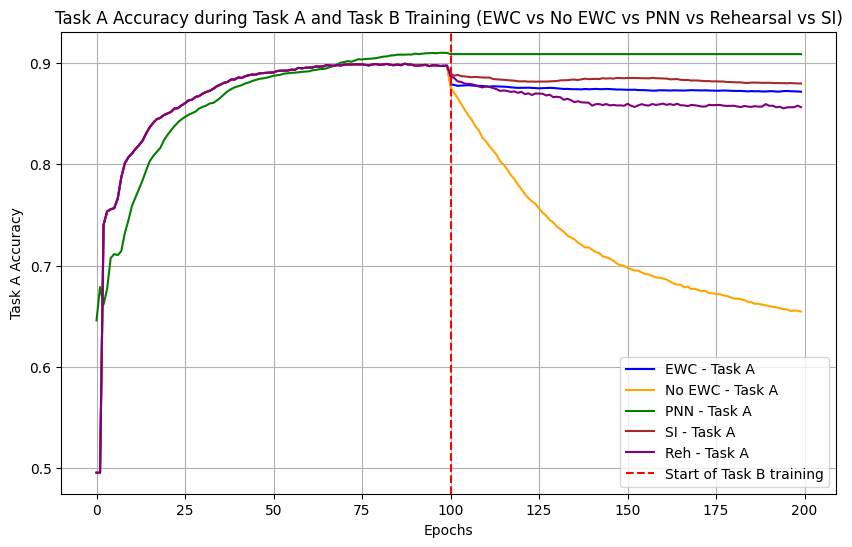

In [29]:
import numpy as np
import matplotlib.pyplot as plt
# Calculate the mean for Task A during Task A and Task B across all runs
ewc_initial_acc = np.mean(epoch_stats_A["Initial"]["accuracy"], axis=0)  # Mean across runs
no_ewc_initial_acc = np.mean(epoch_stats_A["Initial"]["accuracy"], axis=0)  # Same for No EWC
pnn_task_A_during_A = np.mean(epoch_stats_other["pnn"]["A_during_A_val"], axis=0)
#si_task_A_during_A = np.mean(epoch_stats_other["si"]["A_during_A_val"], axis=0)
reh_task_A_during_A = np.mean(epoch_stats_other["reh"]["A_during_A_val"], axis=0)

ewc_initial_acc = ewc_initial_acc[:100]
no_ewc_initial_acc = no_ewc_initial_acc[:100]
pnn_task_A_during_A = pnn_task_A_during_A[:100]


# Now for Task A accuracy during Task B training
ewc_task_A_during_B = np.mean(epoch_stats["ewc"]["val_task_A_during_B"], axis=0)  # Average over runs
no_ewc_task_A_during_B = np.mean(epoch_stats["no_ewc"]["val_task_A_during_B"], axis=0)  # Same for No EWC
pnn_task_A_during_B = np.mean(epoch_stats_other["pnn"]["val_task_A_during_B"], axis=0) # Same for pnn
si_task_A_during_B = np.mean(epoch_stats_other["si"]["val_task_A_during_B"], axis=0) # Same for si
reh_task_A_during_B = np.mean(epoch_stats_other["reh"]["val_task_A_during_B"], axis=0) # Same for reh

pnn_task_A_during_B = pnn_task_A_during_B[:100]


# Concatenate the Task A accuracy during Task A and Task B phases
ewc_task_A_combined = np.concatenate([ewc_initial_acc, ewc_task_A_during_B])
no_ewc_task_A_combined = np.concatenate([no_ewc_initial_acc, no_ewc_task_A_during_B])
pnn_task_A_combined = np.concatenate([pnn_task_A_during_A, pnn_task_A_during_B])
si_task_A_combined = np.concatenate([no_ewc_initial_acc, si_task_A_during_B])
reh_task_A_combined = np.concatenate([no_ewc_initial_acc, reh_task_A_during_B])

# X-axis: first half for Task A training, second half for Task B training
total_epochs = len(ewc_task_A_combined)
x_values = np.arange(total_epochs)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x_values, ewc_task_A_combined, label='EWC - Task A', color='blue')
plt.plot(x_values, no_ewc_task_A_combined, label='No EWC - Task A', color='orange')
plt.plot(x_values, pnn_task_A_combined, label='PNN - Task A', color='green')
plt.plot(x_values, si_task_A_combined, label='SI - Task A', color='brown')
plt.plot(x_values, reh_task_A_combined, label='Reh - Task A', color='purple')

# Mark the point where Task B training begins
plt.axvline(x=len(ewc_initial_acc), color='red', linestyle='--', label='Start of Task B training')

# Labels, title, and legend
plt.xlabel('Epochs')
plt.ylabel('Task A Accuracy')
plt.title('Task A Accuracy during Task A and Task B Training (EWC vs No EWC vs PNN vs Rehearsal vs SI)')
plt.legend()
plt.grid(True)

# Save and show the plot
#plt.savefig('TIL_task_A_during_A_and_B.png')
plt.show()


In [349]:
epoch_stats_other["reh"]["A_during_A_val"]

[]

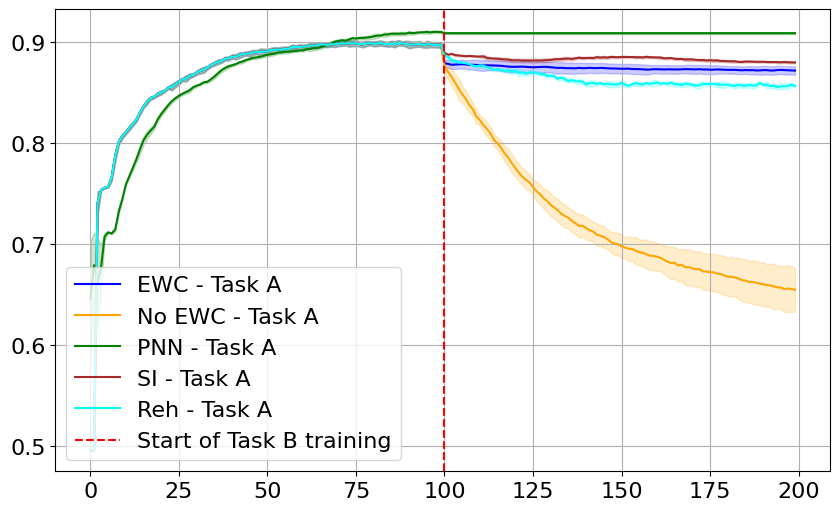

In [45]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate the mean and standard deviation for Task A during Task A training
ewc_initial_acc = np.mean(epoch_stats_A["Initial"]["accuracy"], axis=0)
ewc_initial_acc_std = np.std(epoch_stats_A["Initial"]["accuracy"], axis=0)

no_ewc_initial_acc = np.mean(epoch_stats_A["Initial"]["accuracy"], axis=0)
no_ewc_initial_acc_std = np.std(epoch_stats_A["Initial"]["accuracy"], axis=0)

pnn_task_A_during_A = np.mean(epoch_stats_other["pnn"]["A_during_A_val"], axis=0)
pnn_task_A_during_A_std = np.std(epoch_stats_other["pnn"]["A_during_A_val"], axis=0)

reh_task_A_during_A = np.mean(epoch_stats_other["reh"]["A_during_A_val"], axis=0)
reh_task_A_during_A_std = np.std(epoch_stats_other["reh"]["A_during_A_val"], axis=0)

# Truncate arrays to 100 epochs for Task A training
ewc_initial_acc = ewc_initial_acc[:100]
ewc_initial_acc_std = ewc_initial_acc_std[:100]

no_ewc_initial_acc = no_ewc_initial_acc[:100]
no_ewc_initial_acc_std = no_ewc_initial_acc_std[:100]

pnn_task_A_during_A = pnn_task_A_during_A[:100]
pnn_task_A_during_A_std = pnn_task_A_during_A_std[:100]


# Calculate the mean and standard deviation for Task A during Task B training
ewc_task_A_during_B = np.mean(epoch_stats["ewc"]["val_task_A_during_B"], axis=0)
ewc_task_A_during_B_std = np.std(epoch_stats["ewc"]["val_task_A_during_B"], axis=0)

no_ewc_task_A_during_B = np.mean(epoch_stats_no_ewc["no_ewc"]["val_task_A_during_B"], axis=0)
no_ewc_task_A_during_B_std = np.std(epoch_stats_no_ewc["no_ewc"]["val_task_A_during_B"], axis=0)

pnn_task_A_during_B = np.mean(epoch_stats_other["pnn"]["val_task_A_during_B"], axis=0)
pnn_task_A_during_B_std = np.std(epoch_stats_other["pnn"]["val_task_A_during_B"], axis=0)

si_task_A_during_B = np.mean(epoch_stats_other["si"]["val_task_A_during_B"], axis=0)
si_task_A_during_B_std = np.std(epoch_stats_other["si"]["val_task_A_during_B"], axis=0)

reh_task_A_during_B = np.mean(epoch_stats_other["reh"]["val_task_A_during_B"], axis=0)
reh_task_A_during_B_std = np.std(epoch_stats_other["reh"]["val_task_A_during_B"], axis=0)

# Truncate arrays to 100 epochs for Task B training
pnn_task_A_during_B = pnn_task_A_during_B[:100]
pnn_task_A_during_B_std = pnn_task_A_during_B_std[:100]

# Concatenate mean and standard deviation for Task A and Task B training
ewc_task_A_combined = np.concatenate([ewc_initial_acc, ewc_task_A_during_B])
ewc_task_A_combined_std = np.concatenate([ewc_initial_acc_std, ewc_task_A_during_B_std])

no_ewc_task_A_combined = np.concatenate([no_ewc_initial_acc, no_ewc_task_A_during_B])
no_ewc_task_A_combined_std = np.concatenate([no_ewc_initial_acc_std, no_ewc_task_A_during_B_std])

pnn_task_A_combined = np.concatenate([pnn_task_A_during_A, pnn_task_A_during_B])
pnn_task_A_combined_std = np.concatenate([pnn_task_A_during_A_std, pnn_task_A_during_B_std])

si_task_A_combined = np.concatenate([no_ewc_initial_acc, si_task_A_during_B])
si_task_A_combined_std = np.concatenate([no_ewc_initial_acc_std, si_task_A_during_B_std])

reh_task_A_combined = np.concatenate([no_ewc_initial_acc, reh_task_A_during_B])
reh_task_A_combined_std = np.concatenate([no_ewc_initial_acc_std, reh_task_A_during_B_std])

# Define x-axis for the entire epoch range across both phases
total_epochs = len(ewc_task_A_combined)
x_values = np.arange(total_epochs)

# Plot with variance bands
plt.figure(figsize=(10, 6))

# Plot EWC with variance band
plt.plot(x_values, ewc_task_A_combined, label='EWC - Task A', color='blue')
plt.fill_between(x_values, ewc_task_A_combined - ewc_task_A_combined_std, ewc_task_A_combined + ewc_task_A_combined_std, color='blue', alpha=0.2)

# Plot No EWC with variance band
plt.plot(x_values, no_ewc_task_A_combined, label='No EWC - Task A', color='orange')
plt.fill_between(x_values, no_ewc_task_A_combined - no_ewc_task_A_combined_std, no_ewc_task_A_combined + no_ewc_task_A_combined_std, color='orange', alpha=0.2)

# Plot PNN with variance band
plt.plot(x_values, pnn_task_A_combined, label='PNN - Task A', color='green')
plt.fill_between(x_values, pnn_task_A_combined - pnn_task_A_combined_std, pnn_task_A_combined + pnn_task_A_combined_std, color='green', alpha=0.2)

# Plot SI with variance band
plt.plot(x_values, si_task_A_combined, label='SI - Task A', color='brown')
plt.fill_between(x_values, si_task_A_combined - si_task_A_combined_std, si_task_A_combined + si_task_A_combined_std, color='brown', alpha=0.2)

# Plot Rehearsal with variance band
plt.plot(x_values, reh_task_A_combined, label='Reh - Task A', color='cyan')
plt.fill_between(x_values, reh_task_A_combined - reh_task_A_combined_std, reh_task_A_combined + reh_task_A_combined_std, color='cyan', alpha=0.2)

# Mark the point where Task B training begins
plt.axvline(x=len(ewc_initial_acc), color='red', linestyle='--', label='Start of Task B training')

# Labels, title, and legend
plt.xticks(fontsize=16)                 # Font size for x-axis ticks
plt.yticks(fontsize=16)  
plt.legend(loc='lower left',fontsize=16)
plt.grid(True)

# Save and show the plot
plt.savefig('TIL_task_A_during_A_and_B_with_variance_bigger.png')
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Compute the mean across runs for each method
task_B_ewc = np.mean(epoch_stats["ewc"]["val_task_B"], axis=0)  # Mean across runs for EWC
task_B_no_ewc = np.mean(epoch_stats_no_ewc["no_ewc"]["val_task_B"], axis=0)  # Mean across runs for No EWC
task_B_si = np.mean(epoch_stats_other["si"]["val_acc_B"], axis=0)  # Mean across runs for SI
task_B_reh = np.mean(epoch_stats_other["reh"]["val_acc_B"], axis=0)  # Mean across runs for Rehearsal
task_B_pnn = np.mean(epoch_stats_other["pnn"]["val_acc_B"], axis=0)  # Mean across runs for PNN

task_B_pnn = task_B_pnn[:100]


# Compute the mean across runs for each method on Task B during training on Task A
task_B_during_A_ewc = np.mean(epoch_stats_B["Initial"]["validation"], axis=0)
task_B_during_A_no_ewc = np.mean(epoch_stats_B["Initial"]["validation"], axis=0)
#task_B_during_A_si = np.mean(epoch_stats_other["si"]["B_during_A_val"], axis=0)
#task_B_during_A_reh = np.mean(epoch_stats_other["reh"]["B_during_A_val"], axis=0)
task_B_during_A_pnn = np.mean(epoch_stats_other["pnn"]["B_during_A_val"], axis=0)

task_B_during_A_ewc = task_B_during_A_ewc[:100]
task_B_during_A_no_ewc = task_B_during_A_no_ewc[:100]
task_B_during_A_pnn = task_B_during_A_pnn[:100]
task_B_during_A_si = task_B_during_A_si[:100]


# Concatenate Task B accuracy for both phases: during Task A and during Task B training
ewc_task_B_combined = np.concatenate([task_B_during_A_ewc, task_B_ewc])
no_ewc_task_B_combined = np.concatenate([task_B_during_A_no_ewc, task_B_no_ewc])
pnn_task_B_combined = np.concatenate([task_B_during_A_pnn, task_B_pnn])
si_task_B_combined = np.concatenate([task_B_during_A_si, task_B_si])
reh_task_B_combined = np.concatenate([task_B_during_A_reh, task_B_reh])

# Define x-axis for the entire epoch range across both phases
total_epochs = len(ewc_task_B_combined)
x_values = np.arange(total_epochs)

# Plot the results
plt.figure(figsize=(10, 6))

# Plot MAE for each method
# Plot Task B accuracy during training on Task B for each method
plt.plot(x_values, ewc_task_B_combined, label='EWC - Task B', color='blue')
plt.plot(x_values, no_ewc_task_B_combined, label='No EWC - Task B', color='orange')
plt.plot(x_values, pnn_task_B_combined, label='PNN - Task B', color='green')
plt.plot(x_values, si_task_B_combined, label='SI - Task B', color='brown')
plt.plot(x_values, reh_task_B_combined, label='Rehearsal - Task B', color='purple')

# Mark the point where Task B training begins
plt.axvline(x=len(task_B_ewc), color='red', linestyle='--', label='Start of Task B training')

# Labels, title, and legend
plt.xticks(fontsize=16)                 # Font size for x-axis ticks
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.grid(True)

# Show the plot
plt.savefig('task_Real_World_Task_B_During_A_and_B_bigger.png')
plt.show()


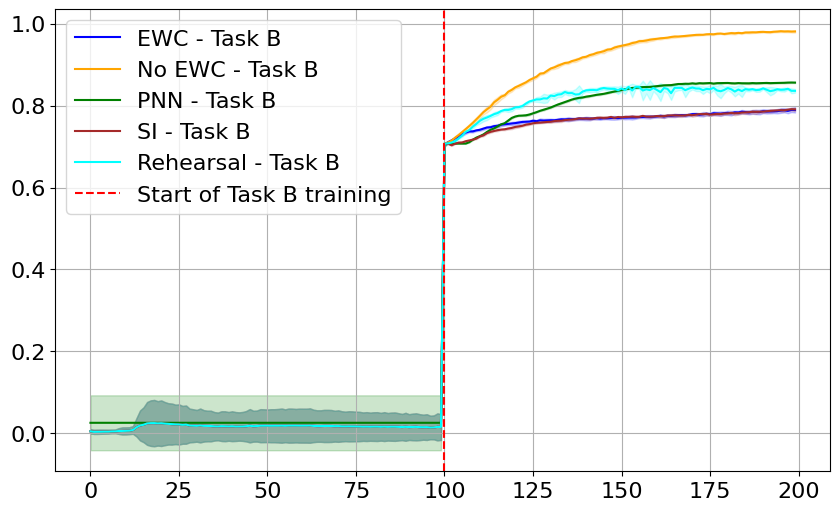

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Compute the mean and standard deviation for Task B during Task B training
task_B_ewc = np.mean(epoch_stats["ewc"]["val_task_B"], axis=0)
task_B_ewc_std = np.std(epoch_stats["ewc"]["val_task_B"], axis=0)

task_B_no_ewc = np.mean(epoch_stats_no_ewc["no_ewc"]["val_task_B"], axis=0)
task_B_no_ewc_std = np.std(epoch_stats_no_ewc["no_ewc"]["val_task_B"], axis=0)

task_B_si = np.mean(epoch_stats_other["si"]["val_acc_B"], axis=0)
task_B_si_std = np.std(epoch_stats_other["si"]["val_acc_B"], axis=0)

task_B_reh = np.mean(epoch_stats_other["reh"]["val_acc_B"], axis=0)
task_B_reh_std = np.std(epoch_stats_other["reh"]["val_acc_B"], axis=0)

task_B_pnn = np.mean(epoch_stats_other["pnn"]["val_acc_B"], axis=0)
task_B_pnn_std = np.std(epoch_stats_other["pnn"]["val_acc_B"], axis=0)

# Truncate arrays for Task B training
task_B_pnn = task_B_pnn[:100]
task_B_pnn_std = task_B_pnn_std[:100]

# Compute the mean and standard deviation for Task B during Task A training
task_B_during_A_ewc = np.mean(epoch_stats_B["Initial"]["validation"], axis=0)
task_B_during_A_ewc_std = np.std(epoch_stats_B["Initial"]["validation"], axis=0)

task_B_during_A_no_ewc = np.mean(epoch_stats_B["Initial"]["validation"], axis=0)
task_B_during_A_no_ewc_std = np.std(epoch_stats_B["Initial"]["validation"], axis=0)

task_B_during_A_pnn = np.mean(epoch_stats_other["pnn"]["B_during_A_val"], axis=0)
task_B_during_A_pnn_std = np.std(epoch_stats_other["pnn"]["B_during_A_val"], axis=0)

# Truncate arrays for Task A training
task_B_during_A_ewc = task_B_during_A_ewc[:100]
task_B_during_A_ewc_std = task_B_during_A_ewc_std[:100]

task_B_during_A_no_ewc = task_B_during_A_no_ewc[:100]
task_B_during_A_no_ewc_std = task_B_during_A_no_ewc_std[:100]

task_B_during_A_pnn = task_B_during_A_pnn[:100]
task_B_during_A_pnn_std = task_B_during_A_pnn_std[:100]

# Concatenate Task B accuracy and standard deviations for both phases
ewc_task_B_combined = np.concatenate([task_B_during_A_ewc, task_B_ewc])
ewc_task_B_combined_std = np.concatenate([task_B_during_A_ewc_std, task_B_ewc_std])

no_ewc_task_B_combined = np.concatenate([task_B_during_A_no_ewc, task_B_no_ewc])
no_ewc_task_B_combined_std = np.concatenate([task_B_during_A_no_ewc_std, task_B_no_ewc_std])

pnn_task_B_combined = np.concatenate([task_B_during_A_pnn, task_B_pnn])
pnn_task_B_combined_std = np.concatenate([task_B_during_A_pnn_std, task_B_pnn_std])

si_task_B_combined = np.concatenate([task_B_during_A_ewc, task_B_si])
si_task_B_combined_std = np.concatenate([task_B_during_A_ewc_std, task_B_si_std])

reh_task_B_combined = np.concatenate([task_B_during_A_ewc, task_B_reh])
reh_task_B_combined_std = np.concatenate([task_B_during_A_ewc_std, task_B_reh_std])

# Define x-axis for the entire epoch range across both phases
total_epochs = len(ewc_task_B_combined)
x_values = np.arange(total_epochs)

# Plot with variance bands
plt.figure(figsize=(10, 6))

# Plot EWC with variance band
plt.plot(x_values, ewc_task_B_combined, label='EWC - Task B', color='blue')
plt.fill_between(x_values, ewc_task_B_combined - ewc_task_B_combined_std, ewc_task_B_combined + ewc_task_B_combined_std, color='blue', alpha=0.2)

# Plot No EWC with variance band
plt.plot(x_values, no_ewc_task_B_combined, label='No EWC - Task B', color='orange')
plt.fill_between(x_values, no_ewc_task_B_combined - no_ewc_task_B_combined_std, no_ewc_task_B_combined + no_ewc_task_B_combined_std, color='orange', alpha=0.2)

# Plot PNN with variance band
plt.plot(x_values, pnn_task_B_combined, label='PNN - Task B', color='green')
plt.fill_between(x_values, pnn_task_B_combined - pnn_task_B_combined_std, pnn_task_B_combined + pnn_task_B_combined_std, color='green', alpha=0.2)

# Plot SI with variance band
plt.plot(x_values, si_task_B_combined, label='SI - Task B', color='brown')
plt.fill_between(x_values, si_task_B_combined - si_task_B_combined_std, si_task_B_combined + si_task_B_combined_std, color='brown', alpha=0.2)

# Plot Rehearsal with variance band
plt.plot(x_values, reh_task_B_combined, label='Rehearsal - Task B', color='cyan')
plt.fill_between(x_values, reh_task_B_combined - reh_task_B_combined_std, reh_task_B_combined + reh_task_B_combined_std, color='cyan', alpha=0.2)

# Mark the point where Task B training begins
plt.axvline(x=len(task_B_during_A_ewc), color='red', linestyle='--', label='Start of Task B training')

# Labels, title, and legend
plt.xticks(fontsize=16)                 # Font size for x-axis ticks
plt.yticks(fontsize=16)
plt.legend(loc='upper left',fontsize=16)
plt.grid(True)

# Save and show the plot
plt.savefig('task_Real_World_Task_B_During_A_and_B_with_variance_bigger.png')
plt.show()


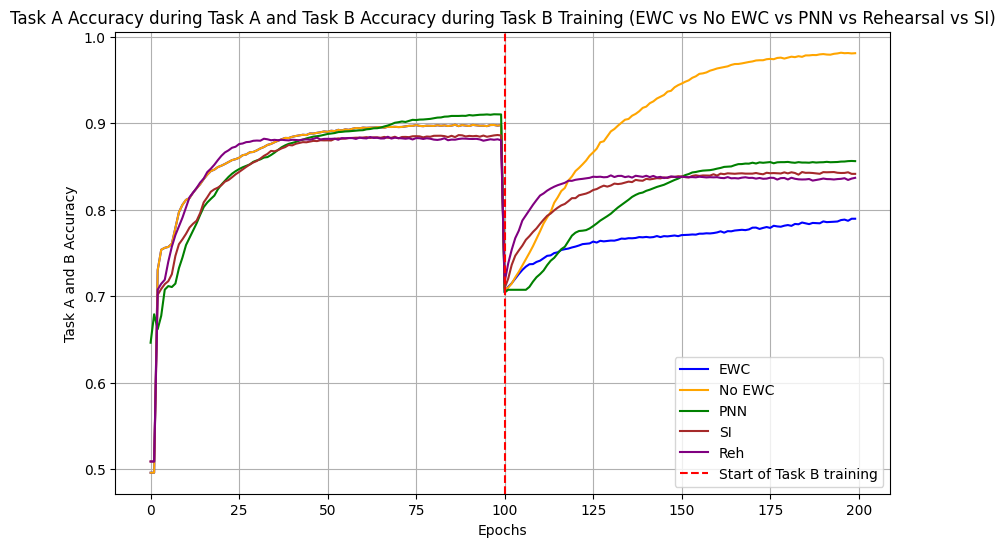

In [200]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate the mean for Task A during Task A and Task B across all runs
ewc_initial_acc = np.mean(epoch_stats_A["Initial"]["accuracy"], axis=0)  # Mean across runs
no_ewc_initial_acc = np.mean(epoch_stats_A["Initial"]["accuracy"], axis=0)  # Same for No EWC
pnn_task_A_during_A = np.mean(epoch_stats_other["pnn"]["A_during_A_val"], axis=0)
si_task_A_during_A = np.mean(epoch_stats_other["si"]["A_during_A_val"], axis=0)
reh_task_A_during_A = np.mean(epoch_stats_other["reh"]["A_during_A_val"], axis=0)


ewc_initial_acc = ewc_initial_acc[:100]
no_ewc_initial_acc = no_ewc_initial_acc[:100]
pnn_task_A_during_A = pnn_task_A_during_A[:100]
si_task_A_during_A = si_task_A_during_A[:100]
reh_task_A_during_A = reh_task_A_during_A[:100]

task_B_ewc = np.mean(epoch_stats["ewc"]["val_task_B"], axis=0)  # Mean across runs for EWC
task_B_no_ewc = np.mean(epoch_stats["no_ewc"]["val_task_B"], axis=0)  # Mean across runs for No EWC
task_B_si = np.mean(epoch_stats_other["si"]["val_acc_B"], axis=0)  # Mean across runs for SI
task_B_reh = np.mean(epoch_stats_other["reh"]["val_acc_B"], axis=0)  # Mean across runs for Rehearsal
task_B_pnn = np.mean(epoch_stats_other["pnn"]["val_acc_B"], axis=0)  # Mean across runs for PNN

task_B_pnn = task_B_pnn[:100]
task_B_si = task_B_si[:100]
task_B_reh = task_B_reh[:100]


# Concatenate the Task A accuracy during Task A and Task B phases
ewc_task_A_combined = np.concatenate([ewc_initial_acc, task_B_ewc])
no_ewc_task_A_combined = np.concatenate([no_ewc_initial_acc, task_B_no_ewc])
pnn_task_A_combined = np.concatenate([pnn_task_A_during_A, task_B_pnn])
si_task_A_combined = np.concatenate([si_task_A_during_A, task_B_si])
reh_task_A_combined = np.concatenate([reh_task_A_during_A, task_B_reh])

# X-axis: first half for Task A training, second half for Task B training
total_epochs = len(ewc_task_A_combined)
x_values = np.arange(total_epochs)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x_values, ewc_task_A_combined, label='EWC', color='blue')
plt.plot(x_values, no_ewc_task_A_combined, label='No EWC', color='orange')
plt.plot(x_values, pnn_task_A_combined, label='PNN', color='green')
plt.plot(x_values, si_task_A_combined, label='SI', color='brown')
plt.plot(x_values, reh_task_A_combined, label='Reh', color='purple')

# Mark the point where Task B training begins
plt.axvline(x=len(ewc_initial_acc), color='red', linestyle='--', label='Start of Task B training')

# Labels, title, and legend
plt.xlabel('Epochs')
plt.ylabel('Task A and B Accuracy')
plt.title('Task A Accuracy during Task A and Task B Accuracy during Task B Training (EWC vs No EWC vs PNN vs Rehearsal vs SI)')
plt.legend()
plt.grid(True)

# Save and show the plot
plt.savefig('task_Real_World_Accuracy_TaskA_and_TaskB.png')
plt.show()


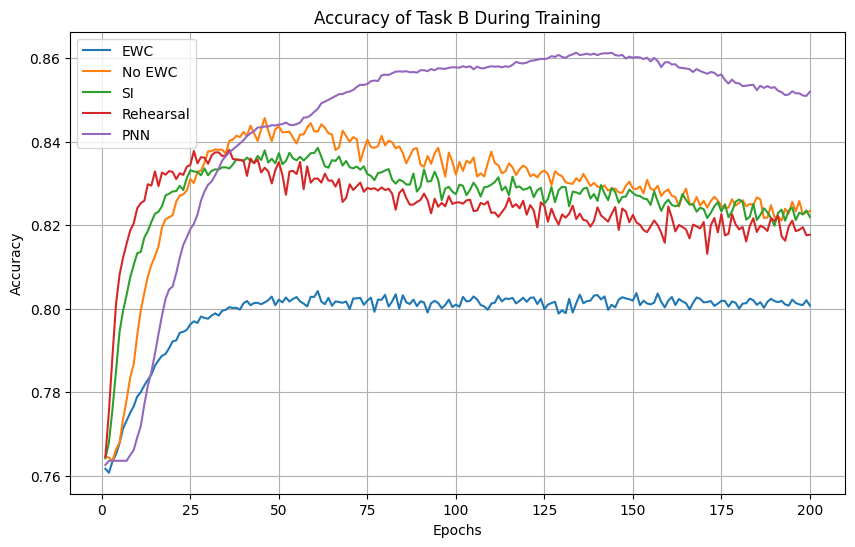

In [62]:
import numpy as np
import matplotlib.pyplot as plt

# Compute the mean across runs for each method
task_B_ewc = np.mean(epoch_stats["ewc"]["task_B"], axis=0)  # Mean across runs for EWC
task_B_no_ewc = np.mean(epoch_stats["no_ewc"]["task_B"], axis=0)  # Mean across runs for No EWC

task_B_ewc = task_B_ewc[:200]
task_B_no_ewc = task_B_no_ewc[:200]

task_B_si = np.mean(epoch_stats_other["si"]["acc_B"], axis=0)  # Mean across runs for SI
task_B_reh = np.mean(epoch_stats_other["reh"]["acc_B"], axis=0)  # Mean across runs for Rehearsal
task_B_pnn = np.mean(epoch_stats_other["pnn"]["acc_B"], axis=0)  # Mean across runs for PNN

# Plot the results
plt.figure(figsize=(10, 6))

# Plot MAE for each method
epochs = np.arange(1, len(task_B_ewc) + 1)
plt.plot(epochs, task_B_ewc, label="EWC")
plt.plot(epochs, task_B_no_ewc, label="No EWC")
plt.plot(epochs, task_B_si, label="SI")
plt.plot(epochs, task_B_reh, label="Rehearsal")
plt.plot(epochs, task_B_pnn, label="PNN")

# Add titles and labels
plt.title("Accuracy of Task B During Training")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

# Show the plot
plt.savefig('til_real_world_accuracy_taskB_updated.png')
plt.show()


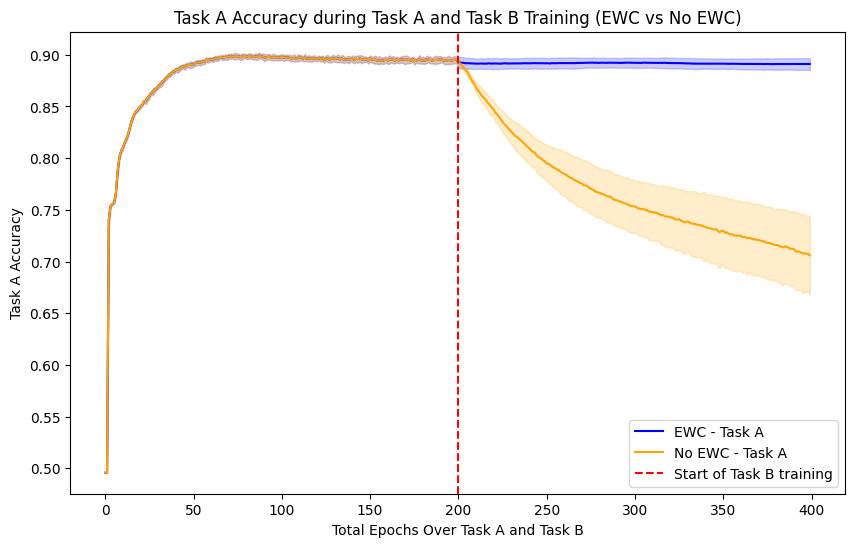

In [59]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate the mean and standard deviation for Task A during Task A and Task B across all runs
ewc_initial_acc_mean = np.mean(epoch_stats_A["Initial"]["accuracy"], axis=0)  # Mean across runs for EWC
ewc_initial_acc_std = np.std(epoch_stats_A["Initial"]["accuracy"], axis=0)    # Standard deviation for EWC

no_ewc_initial_acc_mean = np.mean(epoch_stats_A["Initial"]["accuracy"], axis=0)  # Mean for No EWC
no_ewc_initial_acc_std = np.std(epoch_stats_A["Initial"]["accuracy"], axis=0)    # Standard deviation for No EWC

# Calculate the mean and standard deviation for Task A during Task B training
ewc_task_A_during_B_mean = np.mean(epoch_stats["ewc"]["task_A_during_B"], axis=0)  # Mean over runs for EWC
ewc_task_A_during_B_std = np.std(epoch_stats["ewc"]["task_A_during_B"], axis=0)    # Standard deviation for EWC

no_ewc_task_A_during_B_mean = np.mean(epoch_stats["no_ewc"]["task_A_during_B"], axis=0)  # Mean for No EWC
no_ewc_task_A_during_B_std = np.std(epoch_stats["no_ewc"]["task_A_during_B"], axis=0)    # Standard deviation for No EWC

no_ewc_task_A_during_B_mean=no_ewc_task_A_during_B_mean[:200]
no_ewc_task_A_during_B_std=no_ewc_task_A_during_B_std[:200]

# Concatenate the mean values for Task A accuracy during Task A and Task B phases
ewc_task_A_combined_mean = np.concatenate([ewc_initial_acc_mean, ewc_task_A_during_B_mean])
no_ewc_task_A_combined_mean = np.concatenate([no_ewc_initial_acc_mean, no_ewc_task_A_during_B_mean])

# Concatenate the standard deviations for Task A accuracy during Task A and Task B phases
ewc_task_A_combined_std = np.concatenate([ewc_initial_acc_std, ewc_task_A_during_B_std])
no_ewc_task_A_combined_std = np.concatenate([no_ewc_initial_acc_std, no_ewc_task_A_during_B_std])

# X-axis: first half for Task A training, second half for Task B training
total_epochs = len(ewc_task_A_combined_mean)
x_values = np.arange(total_epochs)

# Plotting
plt.figure(figsize=(10, 6))

# Plot EWC mean with standard deviation shading
plt.plot(x_values, ewc_task_A_combined_mean, label='EWC - Task A', color='blue')
plt.fill_between(x_values, ewc_task_A_combined_mean - ewc_task_A_combined_std,
                 ewc_task_A_combined_mean + ewc_task_A_combined_std, color='blue', alpha=0.2)

# Plot No EWC mean with standard deviation shading
plt.plot(x_values, no_ewc_task_A_combined_mean, label='No EWC - Task A', color='orange')
plt.fill_between(x_values, no_ewc_task_A_combined_mean - no_ewc_task_A_combined_std,
                 no_ewc_task_A_combined_mean + no_ewc_task_A_combined_std, color='orange', alpha=0.2)

# Mark the point where Task B training begins
plt.axvline(x=len(ewc_initial_acc_mean), color='red', linestyle='--', label='Start of Task B training')

# Labels, title, and legend
plt.xlabel('Total Epochs Over Task A and Task B')
plt.ylabel('Task A Accuracy')
plt.title('Task A Accuracy during Task A and Task B Training (EWC vs No EWC)')
plt.legend()

# Save and show the plot
plt.savefig('til_realworld_accuracy_taskA_variance.png')
plt.show()


In [28]:
avg_final_epoch_task_A_A_pnn = np.mean(np.array(epoch_stats_other["pnn"]["A_during_A"])[:, -1])

In [55]:
avg_final_epoch_task_A_A

0.8951382268827455

In [57]:
# Extract data directly from dictionaries without modifying their original structure
import pandas as pd
# Helper function to calculate max, min, and mean for final epoch from a dictionary
def calculate_final_epoch_stats_from_dict(data_dict, key):
    data = np.array(data_dict[key])  # Convert to NumPy array
    final_epoch_data = data[:, -1]  # Extract the last column (final epoch values)
    
    max_final = np.max(final_epoch_data)  # Max of the final epoch
    min_final = np.min(final_epoch_data)  # Min of the final epoch
    mean_final = np.mean(final_epoch_data)  # Mean of the final epoch
    std_final = np.std(final_epoch_data)  # Standard deviation of the final epoch
    upper_bound = mean_final + 2 * std_final  # 2 standard deviations above mean
    lower_bound = mean_final - 2 * std_final  # 2 standard deviations below mean
    
    return max_final, min_final, mean_final, upper_bound, lower_bound

# Extract final epoch statistics for Task A during Task B training
ewc_stats = calculate_final_epoch_stats_from_dict(epoch_stats["ewc"], "val_task_A_during_B")
no_ewc_stats = calculate_final_epoch_stats_from_dict(epoch_stats["no_ewc"], "val_task_A_during_B")
pnn_stats = calculate_final_epoch_stats_from_dict(epoch_stats_other["pnn"], "val_task_A_during_B")
si_stats = calculate_final_epoch_stats_from_dict(epoch_stats_other["si"], "val_task_A_during_B")
reh_stats = calculate_final_epoch_stats_from_dict(epoch_stats_other["reh"], "val_task_A_during_B")

# Create a summary table for Task A during Task B training with 2SD range
final_epoch_summary = pd.DataFrame({
    "Method": ["EWC", "No EWC", "PNN", "SI", "Rehearsal"],
    "Task A After A": [avg_final_epoch_task_A_A, avg_final_epoch_task_A_A, avg_final_epoch_task_A_A_pnn, avg_final_epoch_task_A_A, avg_final_epoch_task_A_A],
    "Max Final Acc After B": [ewc_stats[0], no_ewc_stats[0], pnn_stats[0], si_stats[0], reh_stats[0]],
    "Min Final Acc After B": [ewc_stats[1], no_ewc_stats[1], pnn_stats[1], si_stats[1], reh_stats[1]],
    "Mean Final Acc After B": [ewc_stats[2], no_ewc_stats[2], pnn_stats[2], si_stats[2], reh_stats[2]],
    "Upper Bound (Mean + 2SD)": [ewc_stats[3], no_ewc_stats[3], pnn_stats[3], si_stats[3], reh_stats[3]],
    "Lower Bound (Mean - 2SD)": [ewc_stats[4], no_ewc_stats[4], pnn_stats[4], si_stats[4], reh_stats[4]]
})

# Extract the average final epoch accuracy during Task A training for each method
avg_final_task_A_training = pd.DataFrame({
    "Method": ["EWC", "No EWC", "PNN", "SI", "Rehearsal"],
    "Final Task A Performance After Task A Training": [
        avg_final_epoch_task_A_A, avg_final_epoch_task_A_A, avg_final_epoch_task_A_A_pnn, avg_final_epoch_task_A_A, avg_final_epoch_task_A_A]
})


# Display results
# Display results using print for both tables
print("Task A Performance After Training on Task A")
print(avg_final_task_A_training)

print("\nTask A Performance After Training on Task A and After Task B")
print(final_epoch_summary)





Task A Performance After Training on Task A
      Method  Final Task A Performance After Task A Training
0        EWC                                        0.895138
1     No EWC                                        0.895138
2        PNN                                        0.913060
3         SI                                        0.895138
4  Rehearsal                                        0.895138

Task A Performance After Training on Task A and After Task B
      Method  Task A After A  Max Final Acc After B  Min Final Acc After B  \
0        EWC        0.895138               0.880146               0.864593   
1     No EWC        0.895138               0.682525               0.602928   
2        PNN        0.913060               0.910339               0.906679   
3         SI        0.895138               0.881976               0.878317   
4  Rehearsal        0.895138               0.859103               0.853614   

   Mean Final Acc After B  Upper Bound (Mean + 2SD)  Lower 

In [59]:
# Calculate statistics for the final epoch of Task B during Task B training

# Helper function to calculate mean, max, and min for the final epoch
def calculate_final_epoch_stats_task_B(data_dict, key):
    data = np.array(data_dict[key])  # Convert to NumPy array
    final_epoch_data = data[:, -1]  # Extract the last column (final epoch values)
    
    mean_final = np.mean(final_epoch_data)  # Mean of the final epoch
    max_final = np.max(final_epoch_data)  # Max of the final epoch
    min_final = np.min(final_epoch_data)  # Min of the final epoch
    std_final = np.std(final_epoch_data)  # Standard deviation
    upper_bound = mean_final + 2 * std_final  # 2 standard deviations above mean
    lower_bound = mean_final - 2 * std_final  # 2 standard deviations below mean
    
    return mean_final, max_final, min_final, upper_bound, lower_bound

# Calculate stats for each method
task_B_ewc_stats = calculate_final_epoch_stats_task_B(epoch_stats["ewc"], "val_task_B")
task_B_no_ewc_stats = calculate_final_epoch_stats_task_B(epoch_stats["no_ewc"], "val_task_B")
task_B_si_stats = calculate_final_epoch_stats_task_B(epoch_stats_other["si"], "val_acc_B")
task_B_reh_stats = calculate_final_epoch_stats_task_B(epoch_stats_other["reh"], "val_acc_B")
task_B_pnn_stats = calculate_final_epoch_stats_task_B(epoch_stats_other["pnn"], "val_acc_B")

# Create a summary table for Task B during Task B training with 2SD range
final_epoch_task_B_summary = pd.DataFrame({
    "Method": ["EWC", "No EWC", "PNN", "SI", "Rehearsal"],
    "Mean Final Accuracy": [task_B_ewc_stats[0], task_B_no_ewc_stats[0], task_B_pnn_stats[0], task_B_si_stats[0], task_B_reh_stats[0]],
    "Max Final Accuracy": [task_B_ewc_stats[1], task_B_no_ewc_stats[1], task_B_pnn_stats[1], task_B_si_stats[1], task_B_reh_stats[1]],
    "Min Final Accuracy": [task_B_ewc_stats[2], task_B_no_ewc_stats[2], task_B_pnn_stats[2], task_B_si_stats[2], task_B_reh_stats[2]],
    "Upper Bound (Mean + 2SD)": [task_B_ewc_stats[3], task_B_no_ewc_stats[3], task_B_pnn_stats[3], task_B_si_stats[3], task_B_reh_stats[3]],
    "Lower Bound (Mean - 2SD)": [task_B_ewc_stats[4], task_B_no_ewc_stats[4], task_B_pnn_stats[4], task_B_si_stats[4], task_B_reh_stats[4]]
})

# Display results for Task B
print("Final Accuracy for Task B After Training on Task B")
print(final_epoch_task_B_summary)


Final Accuracy for Task B After Training on Task B
      Method  Mean Final Accuracy  Max Final Accuracy  Min Final Accuracy  \
0        EWC             0.789387            0.800549            0.779506   
1     No EWC             0.980787            0.983532            0.974382   
2        PNN             0.851784            0.853614            0.849954   
3         SI             0.790759            0.796889            0.784081   
4  Rehearsal             0.835865            0.842635            0.827081   

   Upper Bound (Mean + 2SD)  Lower Bound (Mean - 2SD)  
0                  0.802501                  0.776273  
1                  0.986456                  0.975117  
2                  0.854619                  0.848949  
3                  0.798985                  0.782533  
4                  0.845021                  0.826708  
